# Part B
- **DOMAIN:** Automobile
- **CONTEXT:** The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
- **DATA DESCRIPTION:** The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
- All the features are numeric i.e. geometric features extracted from the silhouette.
- **PROJECT OBJECTIVE:** Apply dimensionality reduction technique – PCA and train a model and compare relative results.

In [52]:
dfv=pd.read_csv('vehicle.csv')

In [53]:
dfv.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95        48.00                 83.00        178.00   
1           91        41.00                 84.00        141.00   
2          104        50.00                106.00        209.00   
3           93        41.00                 82.00        159.00   
4           85        44.00                 70.00        205.00   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                 72.00                       10         162.00   
1                 57.00                        9         149.00   
2                 66.00                       10         207.00   
3                 63.00                        9         144.00   
4                103.00                       52         149.00   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0          42.00                   20.00                        159   
1          45.00                   19.00                        143   
2          32.00                   23.00                        158   
3          46.00                   19.00                        143   
4          45.00                   19.00                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0           176.00             379.00                     184.00   
1           170.00             330.00                     158.00   
2           223.00             635.00                     220.00   
3           160.00             309.00                     127.00   
4           241.00             325.00                     188.00   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                        70.00            6.00             16.00   
1                        72.00            9.00             14.00   
2                        73.00           14.00              9.00   
3                        63.00            6.00             10.00   
4                       127.00            9.00             11.00   

   skewness_about.2  hollows_ratio class  
0            187.00            197   van  
1            189.00            199   van  
2            188.00            196   car  
3            199.00            207   van  
4            180.00            183   bus

In [54]:
dfv.shape

(846, 19)

In [55]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [56]:
dfv.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [57]:
for col in dfv.columns:
    null_col_dfv=dfv[col].isna().sum()
    print('The number of missing values in Column \'{0}\' is = {1} and the percentage is = {2:.2f}%'.format(col,null_col_dfv,null_col_dfv*100/dfv.shape[0]))

The number of missing values in Column 'compactness' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'circularity' is = 5 and the percentage is = 0.59%
The number of missing values in Column 'distance_circularity' is = 4 and the percentage is = 0.47%
The number of missing values in Column 'radius_ratio' is = 6 and the percentage is = 0.71%
The number of missing values in Column 'pr.axis_aspect_ratio' is = 2 and the percentage is = 0.24%
The number of missing values in Column 'max.length_aspect_ratio' is = 0 and the percentage is = 0.00%
The number of missing values in Column 'scatter_ratio' is = 1 and the percentage is = 0.12%
The number of missing values in Column 'elongatedness' is = 1 and the percentage is = 0.12%
The number of missing values in Column 'pr.axis_rectangularity' is = 3 and the percentage is = 0.35%
The number of missing values in Column 'max.length_rectangularity' is = 0 and the percentage is = 0.00%
The number of missing values in Column '

**We'll impute the missing values with the median values of the column**

In [58]:
for col in dfv.columns:
    if col != 'class':
        dfv[col].fillna(dfv[col].median(), inplace=True)

In [59]:
dfv.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

**Now none of the columns have missing values**

In [60]:
dfv['class'].value_counts()


car    429
bus    218
van    199
Name: class, dtype: int64

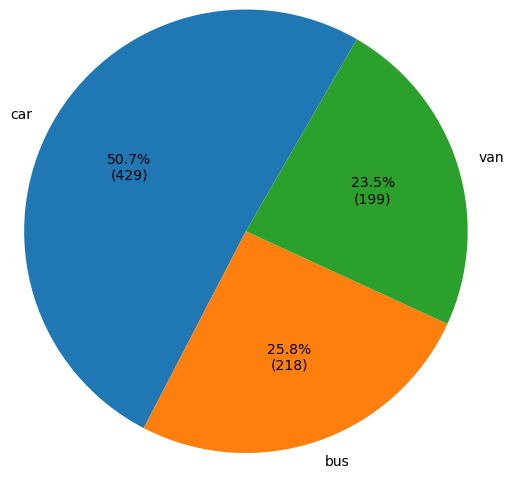

In [61]:
total = dfv['class'].value_counts().values.sum()
explode = [0.1,0.1,0.1]
def fmt(x): #Defining function to include the count and percentage of the labels in the pie-chart
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100);
_=plt.pie(labels=dfv['class'].value_counts().index,
        x=dfv['class'].value_counts(),
        startangle=60,
        autopct=fmt,
        radius=1.5,
        textprops={'fontsize':10}
       )

In [62]:
dfv.duplicated().sum()

0

**There are no duplicate rows in the dataset**

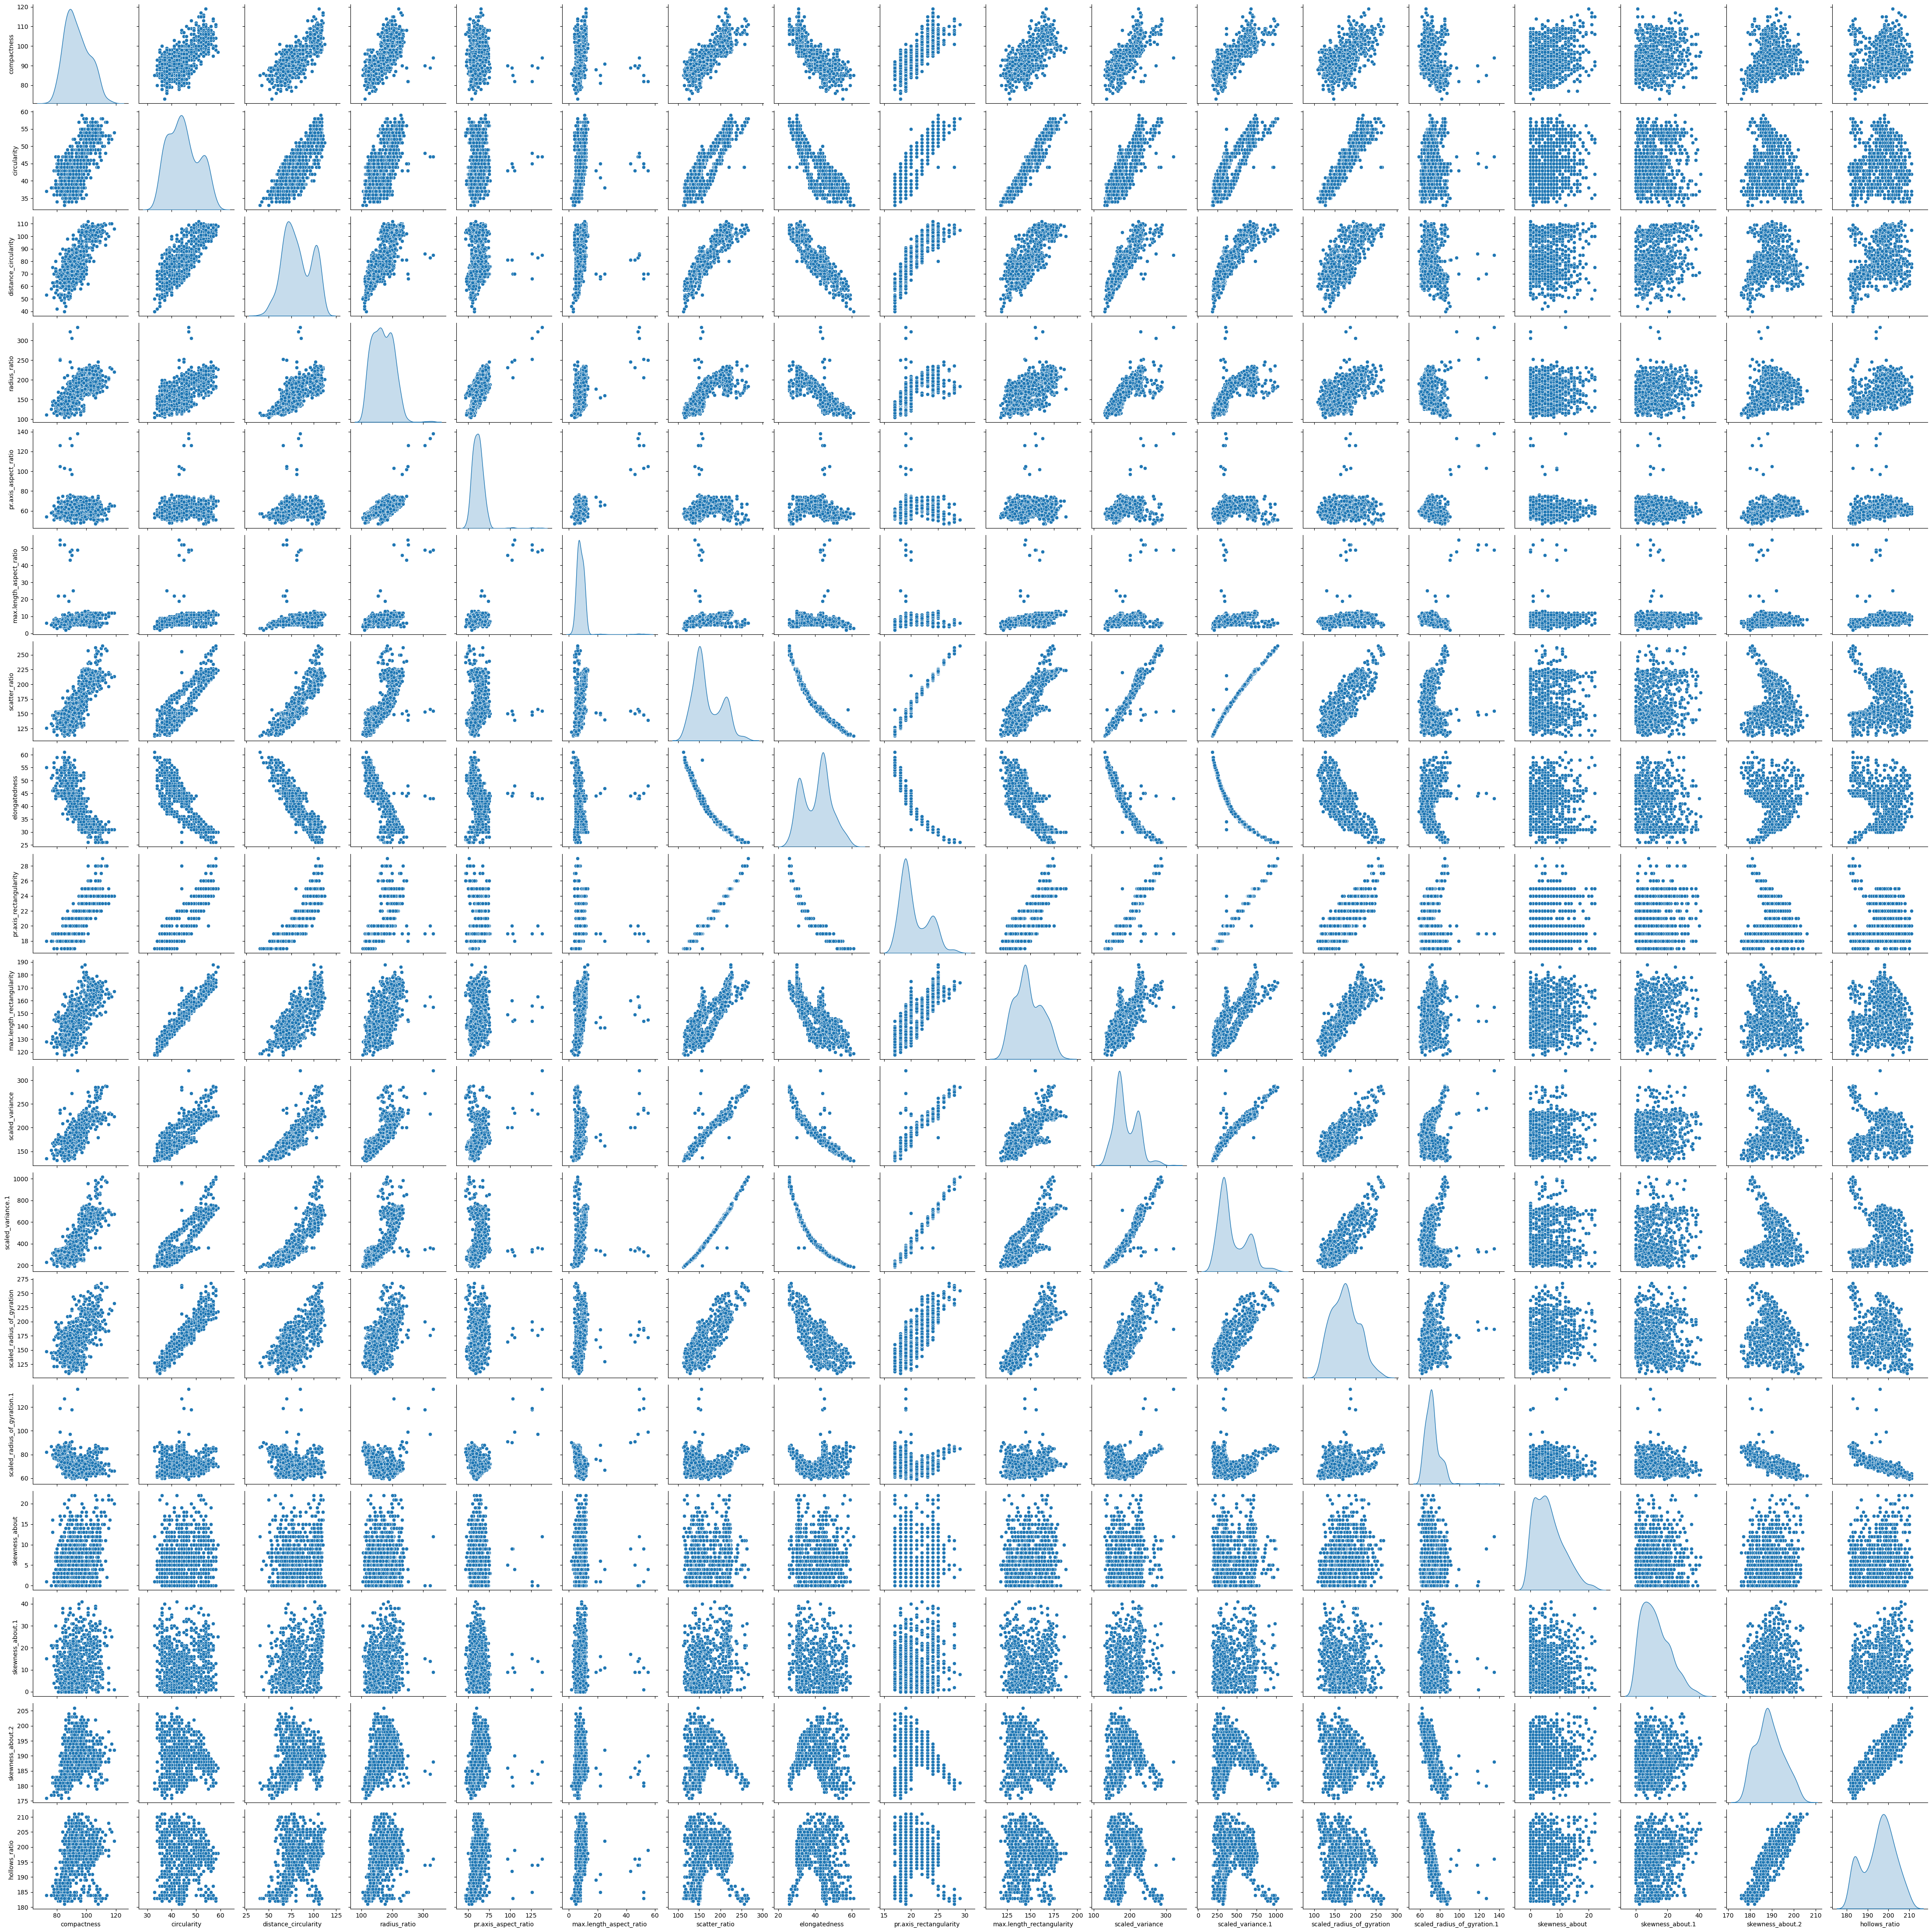

In [63]:
# independant variables
X = dfv.drop(['class'], axis=1)
# the dependent variable
y = dfv[['class']]

sns.pairplot(X, diag_kind='kde')

<Figure size 2000x2000 with 0 Axes>

<Axes: >

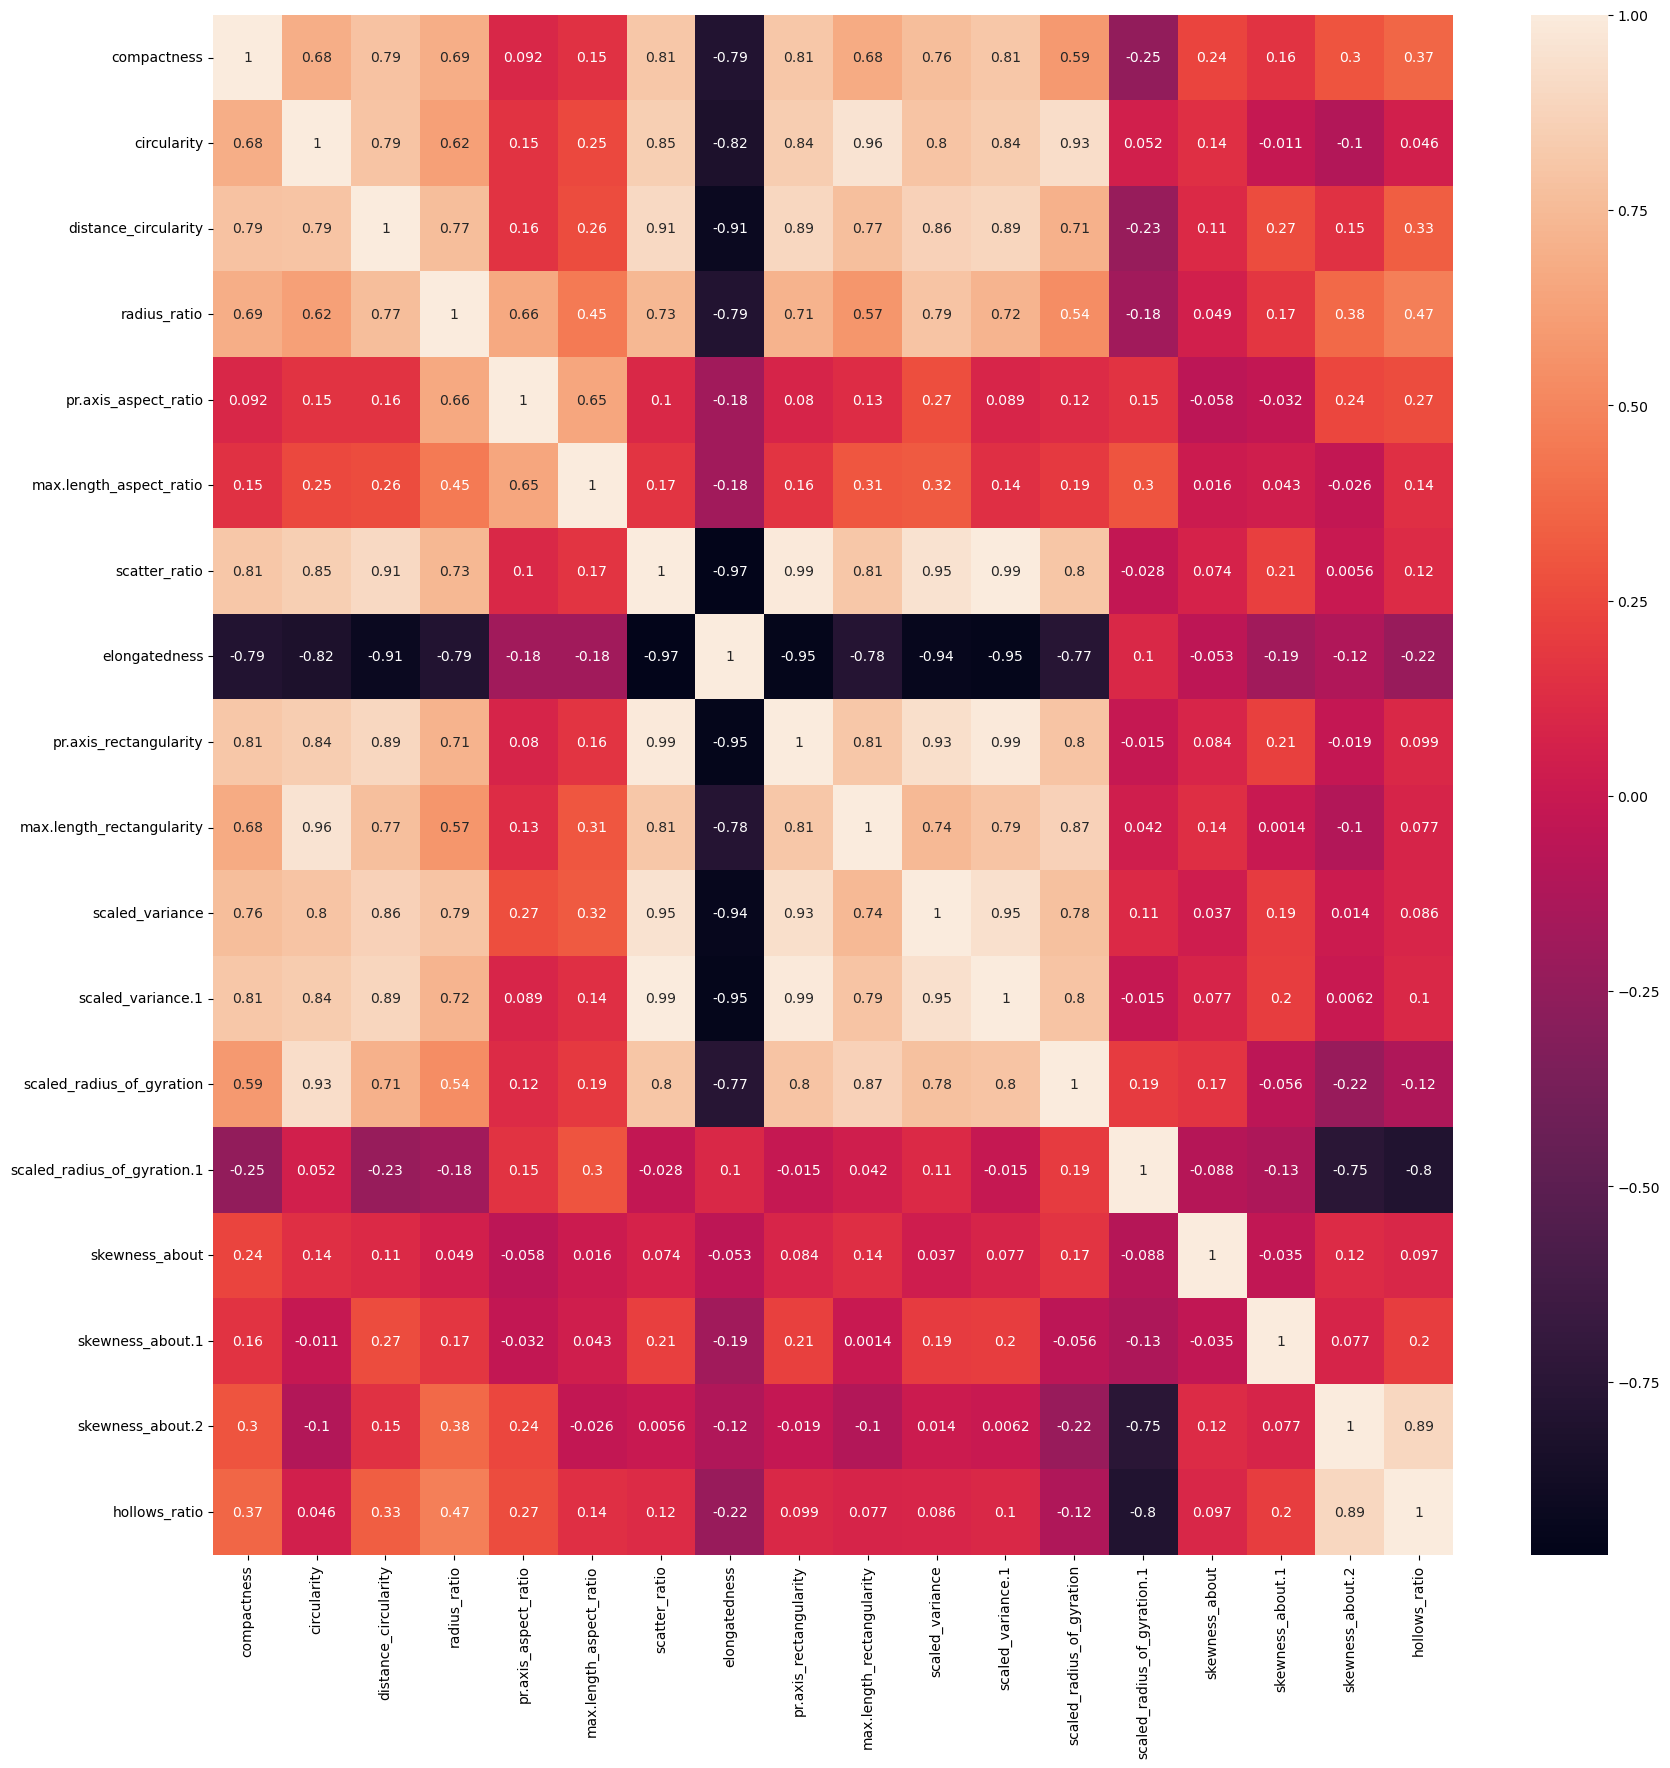

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(dfv.corr(),annot=True,cbar=True)

**From pairplot and heatmap we can see there are many feature which are highly correlated**

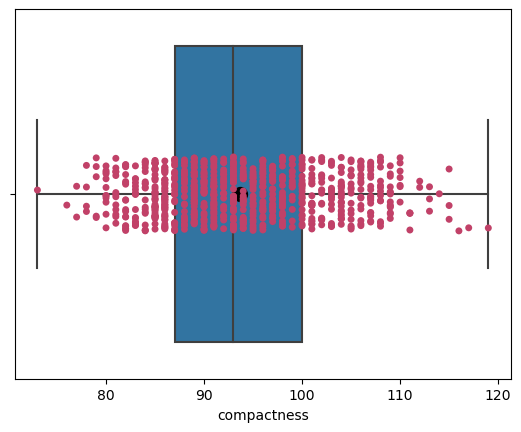

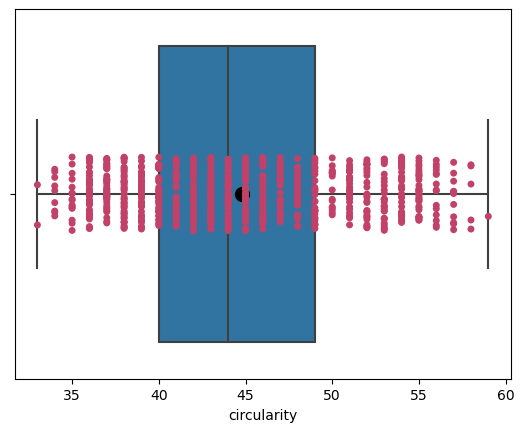

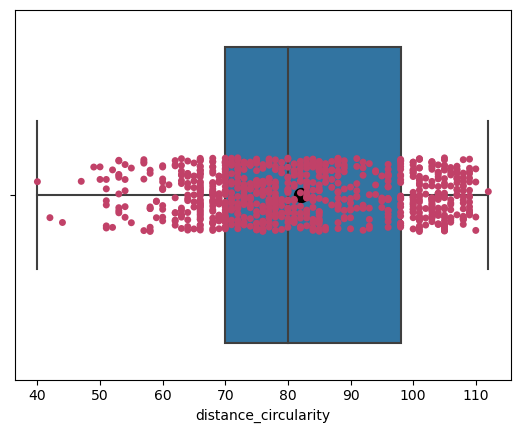

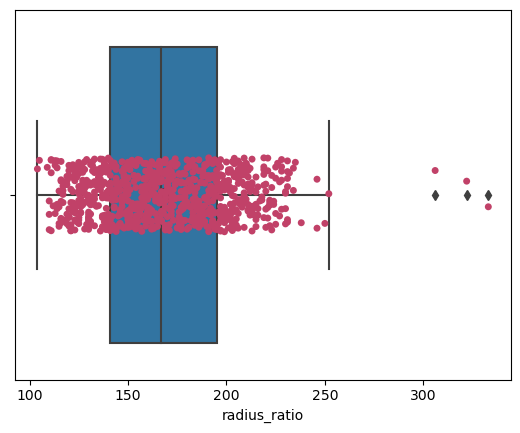

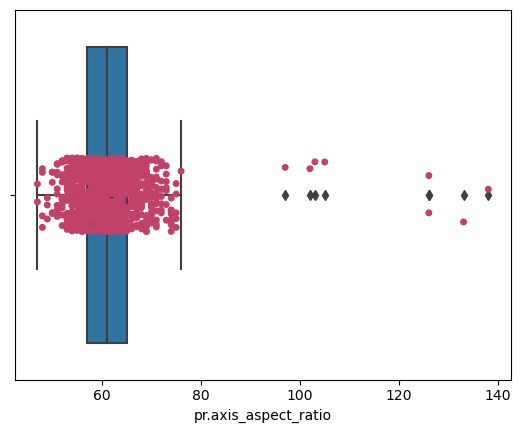

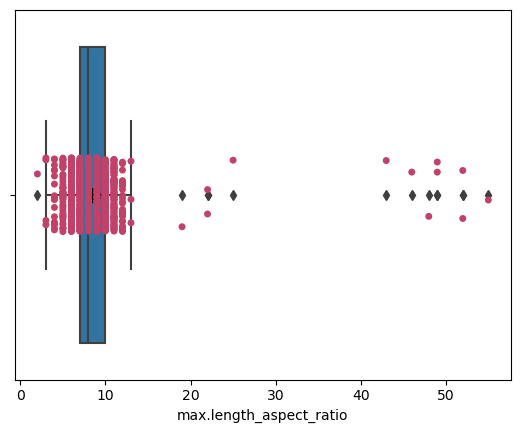

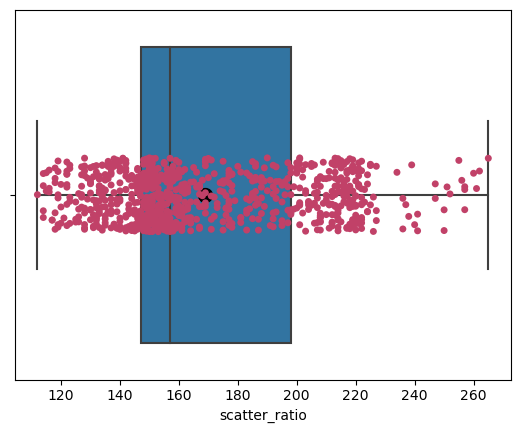

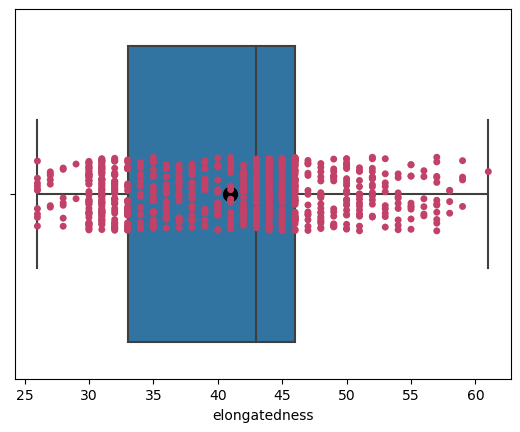

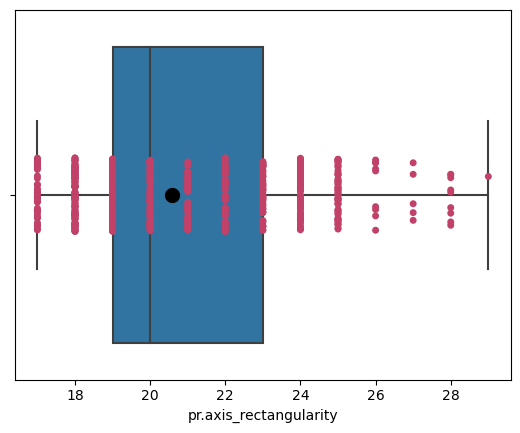

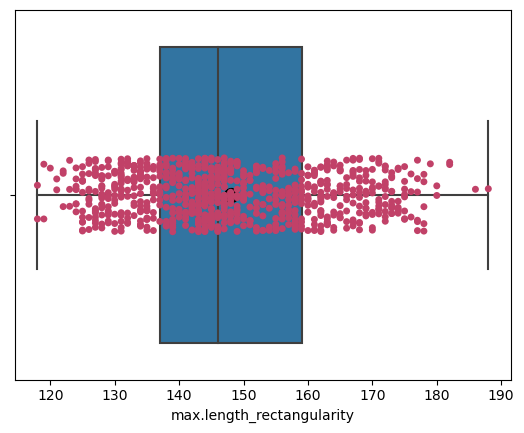

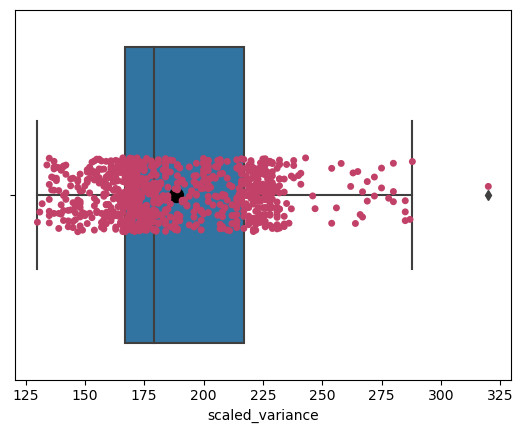

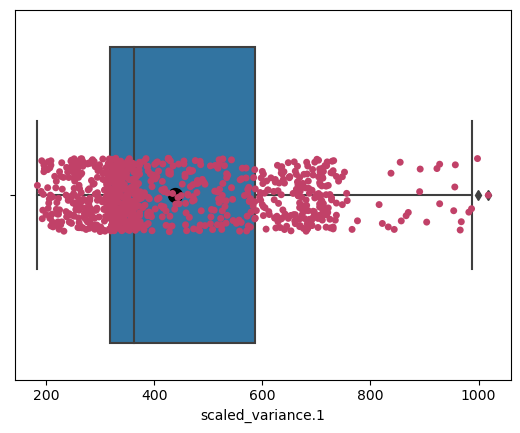

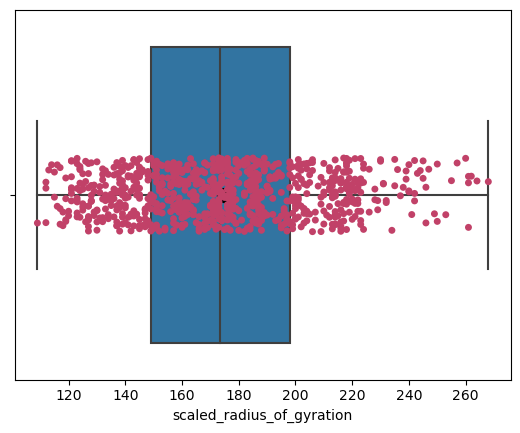

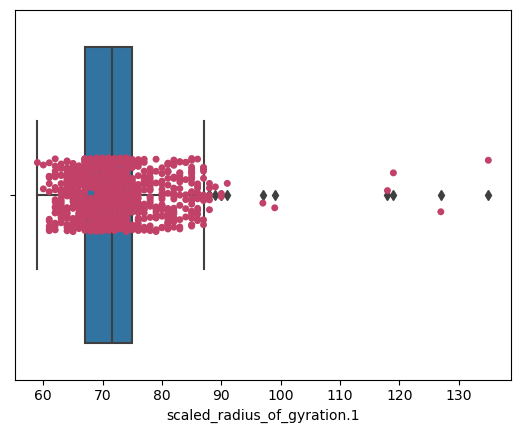

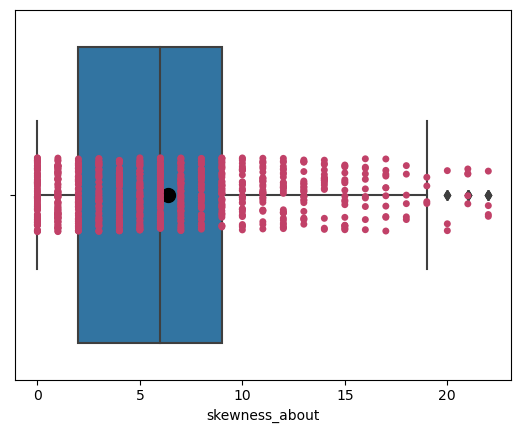

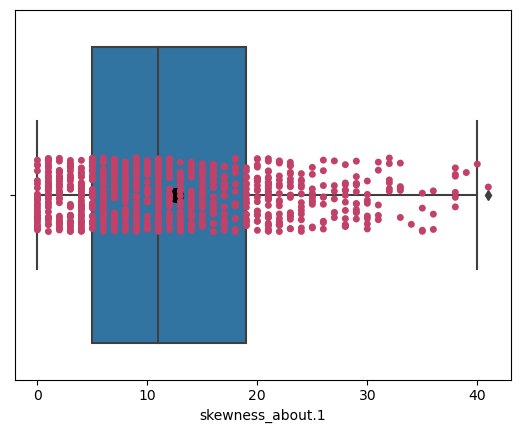

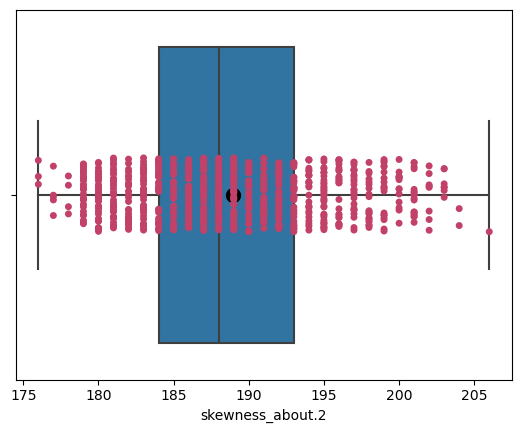

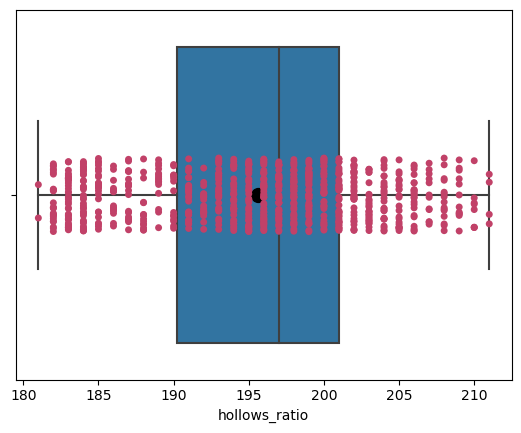

In [65]:
for col in X.columns:
    _=sns.boxplot(data=X,
            x=col,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"10"});
    _=sns.stripplot(data=X,x=col,palette = 'flare');
    plt.show()

**Based on the boxplot we see there are a few outliers in few columns of the dataset. PCA is sensitive to outliers, but here the number of outliers and he skewness of data is not huge we'll not apply outlier treatment as these maybe important to form the clusters. Outlier treatment if required should be confirmed by domain experts**

**We'll scale the data with zscore scaler**

In [66]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         0.16         0.52                  0.06          0.27   
1        -0.33        -0.62                  0.12         -0.84   
2         1.25         0.84                  1.52          1.20   
3        -0.08        -0.62                 -0.01         -0.30   
4        -1.05        -0.13                 -0.77          1.08   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  1.31                     0.31          -0.21   
1                 -0.59                     0.09          -0.60   
2                  0.55                     0.31           1.15   
3                  0.17                     0.09          -0.75   
4                  5.25                     9.44          -0.60   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           0.14                   -0.22                       0.76   
1           0.52                   -0.61                      -0.34   
2          -1.14                    0.94                       0.69   
3           0.65                   -0.61                      -0.34   
4           0.52                   -0.61                      -0.28   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            -0.40              -0.34                       0.29   
1            -0.59              -0.62                      -0.51   
2             1.10               1.11                       1.39   
3            -0.91              -0.74                      -1.47   
4             1.67              -0.65                       0.41   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                        -0.33           -0.07              0.38   
1                        -0.06            0.54              0.16   
2                         0.07            1.56             -0.40   
3                        -1.27           -0.07             -0.29   
4                         7.31            0.54             -0.18   

   skewness_about.2  hollows_ratio  
0             -0.31           0.18  
1              0.01           0.45  
2             -0.15           0.05  
3              1.64           1.53  
4             -1.45          -1.70

**Encoding the class feature**

In [67]:
from sklearn.preprocessing import LabelEncoder
labels=LabelEncoder()
y['class']=labels.fit_transform(y['class'])
y['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

**0: bus, 1: car, 2: van**

In [68]:
# Splitting X and y into training and test set in 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.20, random_state=1)

In [69]:
from sklearn import svm
from sklearn import metrics
import time
start=time.time()
clf=svm.SVC() # Default SVM Model
clf.fit(X_train,y_train)
end=time.time()
y_predict_test=clf.predict(X_test)
y_predict_train=clf.predict(X_train)
print('Score for the trained base SVM model: {0}'.format(metrics.accuracy_score(y_test, y_predict_test)))
print('time in seconds: ',(end-start))

SVC()

Score for the trained base SVM model: 0.9588235294117647
time in seconds:  0.015624046325683594


In [70]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [71]:
import string
labels= ['bus','car','van']
pred_labels=["Pred "+s for s in labels]

**Confusion Matrix for Training data**

<Axes: >

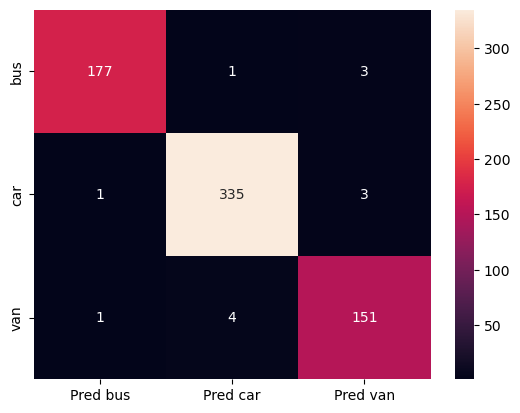

In [72]:
cm=metrics.confusion_matrix(y_train, y_predict_train,labels=[0, 1,2])
df_cm_train=pd.DataFrame(cm,index=[i for i in labels],columns=[col for col in pred_labels] )
sns.heatmap(data=df_cm_train,annot=True,fmt='g')

**Confusion Matrix for Testing data**

<Axes: >

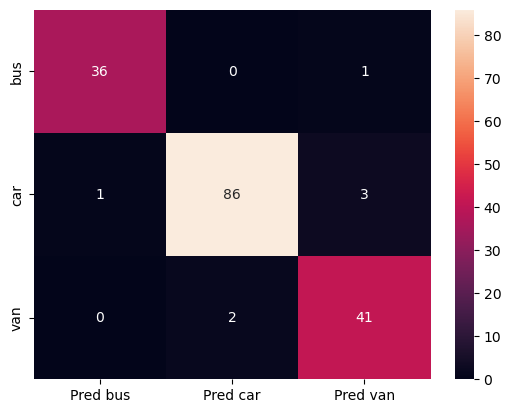

In [73]:
cm=metrics.confusion_matrix(y_test, y_predict_test,labels=[0, 1,2])
df_cm_test=pd.DataFrame(cm,index=[i for i in labels],columns=[col for col in pred_labels] )
sns.heatmap(data=df_cm_test,annot=True,fmt='g')

**Classification Report for Training data**

In [74]:
print("Classification  Report for the Model on Training data:\n",metrics.classification_report(y_train,y_predict_train))

Classification  Report for the Model on Training data:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       181
           1       0.99      0.99      0.99       339
           2       0.96      0.97      0.96       156

    accuracy                           0.98       676
   macro avg       0.98      0.98      0.98       676
weighted avg       0.98      0.98      0.98       676



**Classification Report for Testing data**

In [75]:
print("Classification  Report for the Model:\n",metrics.classification_report(y_test,y_predict_test))

Classification  Report for the Model:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.98      0.96      0.97        90
           2       0.91      0.95      0.93        43

    accuracy                           0.96       170
   macro avg       0.95      0.96      0.96       170
weighted avg       0.96      0.96      0.96       170



**Accuracy**

In [76]:
svm_score_test=clf.score(X_test,y_test)
svm_score_train=clf.score(X_train,y_train)
print('Accuracy of the model on train data is: {0:0.2f}'.format(svm_score_train))
print('Accuracy of the model on test data is: {0:0.2f}'.format(svm_score_test))

Accuracy of the model on train data is: 0.98
Accuracy of the model on test data is: 0.96


**Precision**

In [77]:
precision_train_svm = metrics.precision_score(y_train,y_predict_train,average=None)
for i , j in enumerate(precision_train_svm):
    print('The precision of the trained model on train data for class {0} is : {1:0.2f}'.format(labels[i],j))
print('\n##########################################################################\n')    
precision_test_svm = metrics.precision_score(y_test,y_predict_test,average=None)
for i , j in enumerate(precision_test_svm):
    print('The precision of the trained model on test data for class {0} is : {1:0.2f}'.format(labels[i],j))

The precision of the trained model on train data for class bus is : 0.99
The precision of the trained model on train data for class car is : 0.99
The precision of the trained model on train data for class van is : 0.96

##########################################################################

The precision of the trained model on test data for class bus is : 0.97
The precision of the trained model on test data for class car is : 0.98
The precision of the trained model on test data for class van is : 0.91


**Recall**

In [78]:
recall_train_svm = metrics.recall_score(y_train,y_predict_train,average=None)
for i , j in enumerate(recall_train_svm):
    print('The recall of the trained model on train data for class {0} is : {1:0.2f}'.format(labels[i],j))
print('\n##########################################################################\n')    
recall_test_svm = metrics.recall_score(y_test,y_predict_test,average=None)
for i , j in enumerate(recall_test_svm):
    print('The recall of the trained model on test data for class {0} is : {1:0.2f}'.format(labels[i],j))

The recall of the trained model on train data for class bus is : 0.98
The recall of the trained model on train data for class car is : 0.99
The recall of the trained model on train data for class van is : 0.97

##########################################################################

The recall of the trained model on test data for class bus is : 0.97
The recall of the trained model on test data for class car is : 0.96
The recall of the trained model on test data for class van is : 0.95


**F1-Score**

In [79]:
f1_train_svm = metrics.f1_score(y_train,y_predict_train,average=None)
for i , j in enumerate(f1_train_svm):
    print('The F1-score of the trained model on train data for class {0} is : {1:0.2f}'.format(labels[i],j))
print('\n##########################################################################\n')    
f1_test_svm = metrics.f1_score(y_test,y_predict_test,average=None)
for i , j in enumerate(f1_test_svm):
    print('The F1-score of the trained model on test data for class {0} is : {1:0.2f}'.format(labels[i],j))

The F1-score of the trained model on train data for class bus is : 0.98
The F1-score of the trained model on train data for class car is : 0.99
The F1-score of the trained model on train data for class van is : 0.96

##########################################################################

The F1-score of the trained model on test data for class bus is : 0.97
The F1-score of the trained model on test data for class car is : 0.97
The F1-score of the trained model on test data for class van is : 0.93


In [80]:
covMatrix = pd.DataFrame(np.cov(XScaled,rowvar=False))
covMatrix

0     1     2     3     4     5     6     7     8     9     10    11  \
0   1.00  0.69  0.79  0.69  0.09  0.15  0.81 -0.79  0.81  0.68  0.76  0.81   
1   0.69  1.00  0.79  0.62  0.15  0.25  0.85 -0.82  0.84  0.96  0.80  0.84   
2   0.79  0.79  1.00  0.77  0.16  0.26  0.91 -0.91  0.89  0.78  0.86  0.89   
3   0.69  0.62  0.77  1.00  0.66  0.45  0.74 -0.79  0.71  0.57  0.79  0.72   
4   0.09  0.15  0.16  0.66  1.00  0.65  0.10 -0.18  0.08  0.13  0.27  0.09   
5   0.15  0.25  0.26  0.45  0.65  1.00  0.17 -0.18  0.16  0.31  0.32  0.14   
6   0.81  0.85  0.91  0.74  0.10  0.17  1.00 -0.97  0.99  0.81  0.95  0.99   
7  -0.79 -0.82 -0.91 -0.79 -0.18 -0.18 -0.97  1.00 -0.95 -0.78 -0.94 -0.95   
8   0.81  0.84  0.89  0.71  0.08  0.16  0.99 -0.95  1.00  0.81  0.94  0.99   
9   0.68  0.96  0.78  0.57  0.13  0.31  0.81 -0.78  0.81  1.00  0.75  0.80   
10  0.76  0.80  0.86  0.79  0.27  0.32  0.95 -0.94  0.94  0.75  1.00  0.95   
11  0.81  0.84  0.89  0.72  0.09  0.14  0.99 -0.95  0.99  0.80  0.95  1.00   
12  0.59  0.93  0.71  0.54  0.12  0.19  0.80 -0.77  0.80  0.87  0.78  0.80   
13 -0.25  0.05 -0.23 -0.18  0.15  0.30 -0.03  0.10 -0.02  0.04  0.11 -0.02   
14  0.24  0.14  0.11  0.05 -0.06  0.02  0.07 -0.05  0.08  0.14  0.04  0.08   
15  0.16 -0.01  0.27  0.17 -0.03  0.04  0.21 -0.19  0.21  0.00  0.19  0.20   
16  0.30 -0.10  0.15  0.38  0.24 -0.03  0.01 -0.12 -0.02 -0.10  0.01  0.01   
17  0.37  0.05  0.33  0.47  0.27  0.14  0.12 -0.22  0.10  0.08  0.09  0.10   

      12    13    14    15    16    17  
0   0.59 -0.25  0.24  0.16  0.30  0.37  
1   0.93  0.05  0.14 -0.01 -0.10  0.05  
2   0.71 -0.23  0.11  0.27  0.15  0.33  
3   0.54 -0.18  0.05  0.17  0.38  0.47  
4   0.12  0.15 -0.06 -0.03  0.24  0.27  
5   0.19  0.30  0.02  0.04 -0.03  0.14  
6   0.80 -0.03  0.07  0.21  0.01  0.12  
7  -0.77  0.10 -0.05 -0.19 -0.12 -0.22  
8   0.80 -0.02  0.08  0.21 -0.02  0.10  
9   0.87  0.04  0.14  0.00 -0.10  0.08  
10  0.78  0.11  0.04  0.19  0.01  0.09  
11  0.80 -0.02  0.08  0.20  0.01  0.10  
12  1.00  0.19  0.17 -0.06 -0.22 -0.12  
13  0.19  1.00 -0.09 -0.13 -0.75 -0.80  
14  0.17 -0.09  1.00 -0.04  0.12  0.10  
15 -0.06 -0.13 -0.04  1.00  0.08  0.21  
16 -0.22 -0.75  0.12  0.08  1.00  0.89  
17 -0.12 -0.80  0.10  0.21  0.89  1.00

In [81]:
from sklearn.decomposition import PCA
pca_10 = PCA(n_components=10)
pca_10.fit(XScaled)

PCA(n_components=10)

**Eigen Values**

In [82]:
print(pca_10.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


**Eigen Vectors**

In [83]:
print(pca_10.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

**Percentage of variance explained by each eigen Vector**

In [84]:
print(pca_10.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


**Cumulative Variance plot**

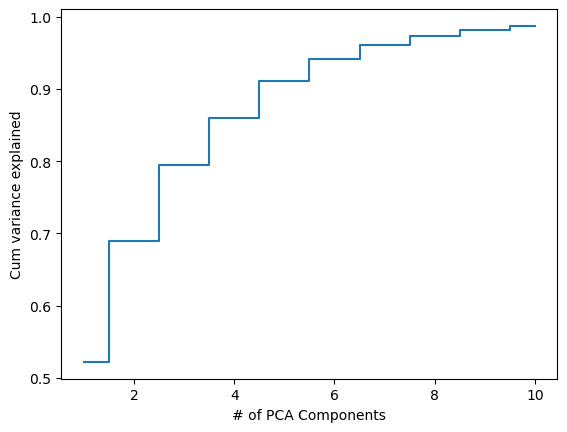

In [85]:
_=plt.step(list(range(1,11)),np.cumsum(pca_10.explained_variance_ratio_), where='mid')
_=plt.ylabel('Cum variance explained')
_=plt.xlabel('# of PCA Components')
plt.show()

**Percentage variance explained plot**

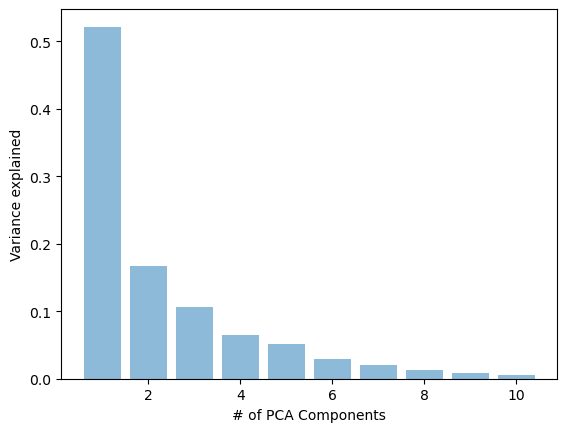

In [86]:
_=plt.bar(list(range(1,11)),pca_10.explained_variance_ratio_,alpha=0.5, align='center')
_=plt.ylabel('Variance explained')
_=plt.xlabel('# of PCA Components')
plt.show()

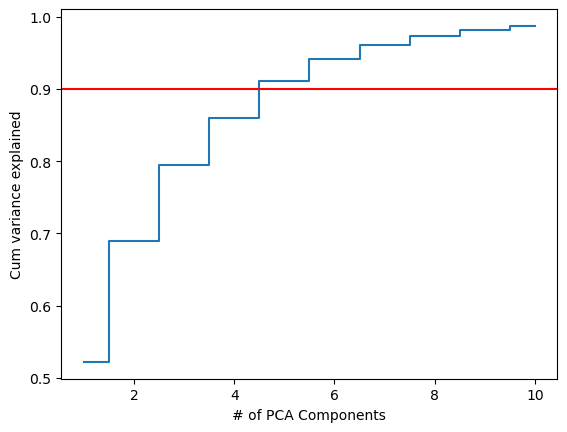

In [87]:
_=plt.step(list(range(1,11)),np.cumsum(pca_10.explained_variance_ratio_), where='mid')
_=plt.ylabel('Cum variance explained')
_=plt.xlabel('# of PCA Components')
_=plt.axhline(0.9, color='red')
plt.show()


**With 5 PCA components the threshold of 90% variance explanation is met**

**To account for 90% of the variance in the data, we need to select minimum 5 components. We will experiment with 5 and 6 PCA components**

### PCA n_components=5

In [88]:
pca_5 = PCA(n_components=5)
pca_5.fit(XScaled)

PCA(n_components=5)

**Eigen Values**

In [89]:
print(pca_5.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063]


**Eigen Vectors**

In [90]:
print(pca_5.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592035e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008426e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

**Percentage of variance explained by each eigen Vector**

In [91]:
print(pca_5.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869]


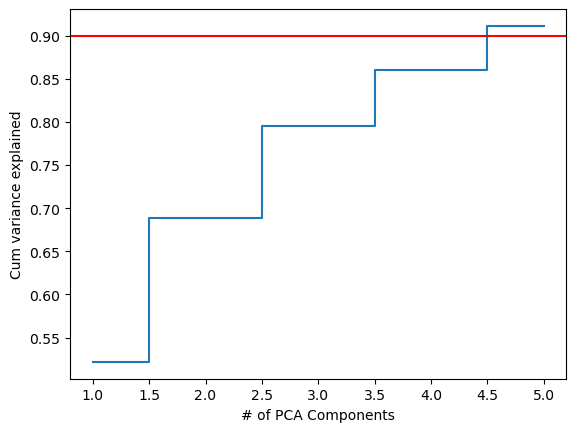

In [92]:
_=plt.step(list(range(1,6)),np.cumsum(pca_5.explained_variance_ratio_), where='mid')
_=plt.ylabel('Cum variance explained')
_=plt.xlabel('# of PCA Components')
_=plt.axhline(0.9, color='red')
plt.show()


**With 5 PCA components we can explain close to 91% of the variance. By increasing the number of components to 6 we should be able to explain the variances better. So we'll try with 6 PCA components as well**

### PCA n_components=6

In [93]:
pca_6 = PCA(n_components=6)
pca_6.fit(XScaled)

PCA(n_components=6)

**Eigen Values**

In [94]:
print(pca_6.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263]


**Eigen Vectors**

In [95]:
print(pca_6.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053416e-02
   3.27257120e-02  3.14147277e-02 -9.

**Percentage of variance explained by each eigen Vector**

In [96]:
print(pca_6.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413]


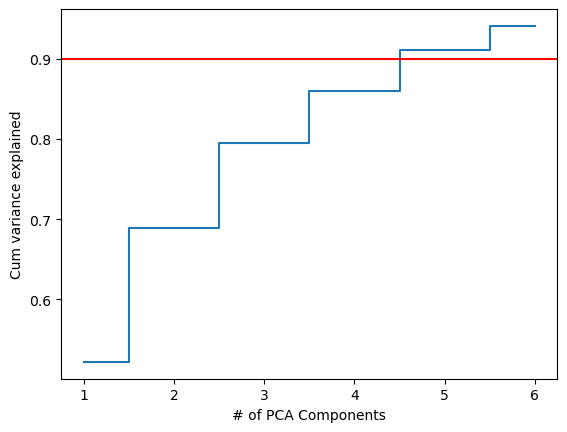

In [97]:
_=plt.step(list(range(1,7)),np.cumsum(pca_6.explained_variance_ratio_), where='mid')
_=plt.ylabel('Cum variance explained')
_=plt.xlabel('# of PCA Components')
_=plt.axhline(0.90, color='red')
plt.show()


**With 6 PCA components we are able to explain close to 94% of the variance**

**Creating new variables from the existing variables**

### PCA n_components=5

In [98]:
Xpca5 = pca_5.transform(XScaled)

In [99]:
Xpca5

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00,
         1.76612370e-01,  7.93007074e-02],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01,
         2.33234117e-01,  6.93948582e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02,
         1.20221219e+00,  7.31732265e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01,
         2.95652324e-01, -1.34423636e+00],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01,
        -1.93367514e+00,  4.27680055e-02],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01,
        -1.22480708e+00, -5.40510365e-02]])

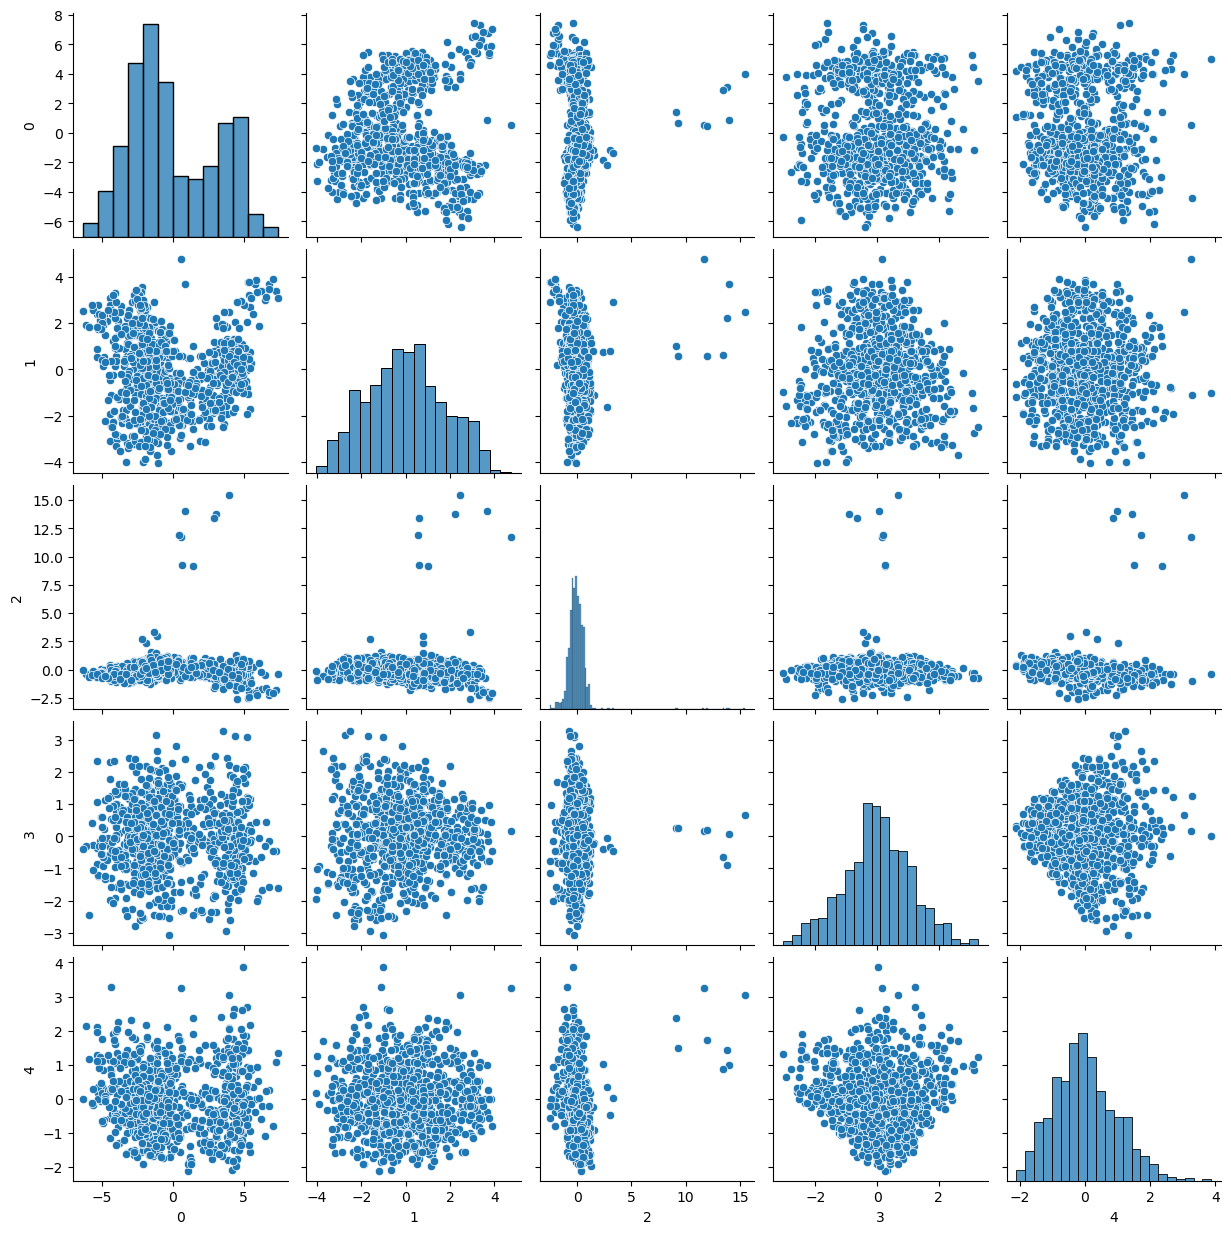

In [100]:
sns.pairplot(pd.DataFrame(Xpca5))

**Splitting the transformed features into train and test sets**

In [101]:
# Splitting X and y into training and test set in 80:20 ratio
X_train_pca5, X_test_pca5, y_train_pca5, y_test_pca5 = train_test_split(Xpca5, y, test_size=0.20, random_state=1)

**We'll train the SVM model on the transformed dataset**

In [102]:
start=time.time()
clf_pca5=svm.SVC() # Default SVM Model
clf_pca5.fit(X_train_pca5,y_train_pca5)
end=time.time()
y_predict_test_pca5=clf_pca5.predict(X_test_pca5)
y_predict_train_pca5=clf_pca5.predict(X_train_pca5)
print('Score for the trained SVM model using PCA 5 components data is: {0}'.format(metrics.accuracy_score(y_test_pca5, y_predict_test_pca5)))
print('time in seconds: ',(end-start))

SVC()

Score for the trained SVM model using PCA 5 components data is: 0.7764705882352941
time in seconds:  0.05880379676818848


In [103]:
clf_pca5.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### PCA n_components=6

**Creating new variables from the existing variables**

In [104]:
Xpca6 = pca_6.transform(XScaled)

In [105]:
Xpca6

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00,
         1.76612370e-01,  7.93007079e-02, -7.57446693e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01,
         2.33234117e-01,  6.93948582e-01, -5.17161832e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02,
         1.20221219e+00,  7.31732265e-01,  7.05041037e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01,
         2.95652324e-01, -1.34423635e+00, -2.17069763e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01,
        -1.93367514e+00,  4.27680052e-02, -4.02491279e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01,
        -1.22480708e+00, -5.40510367e-02, -3.35637136e-01]])

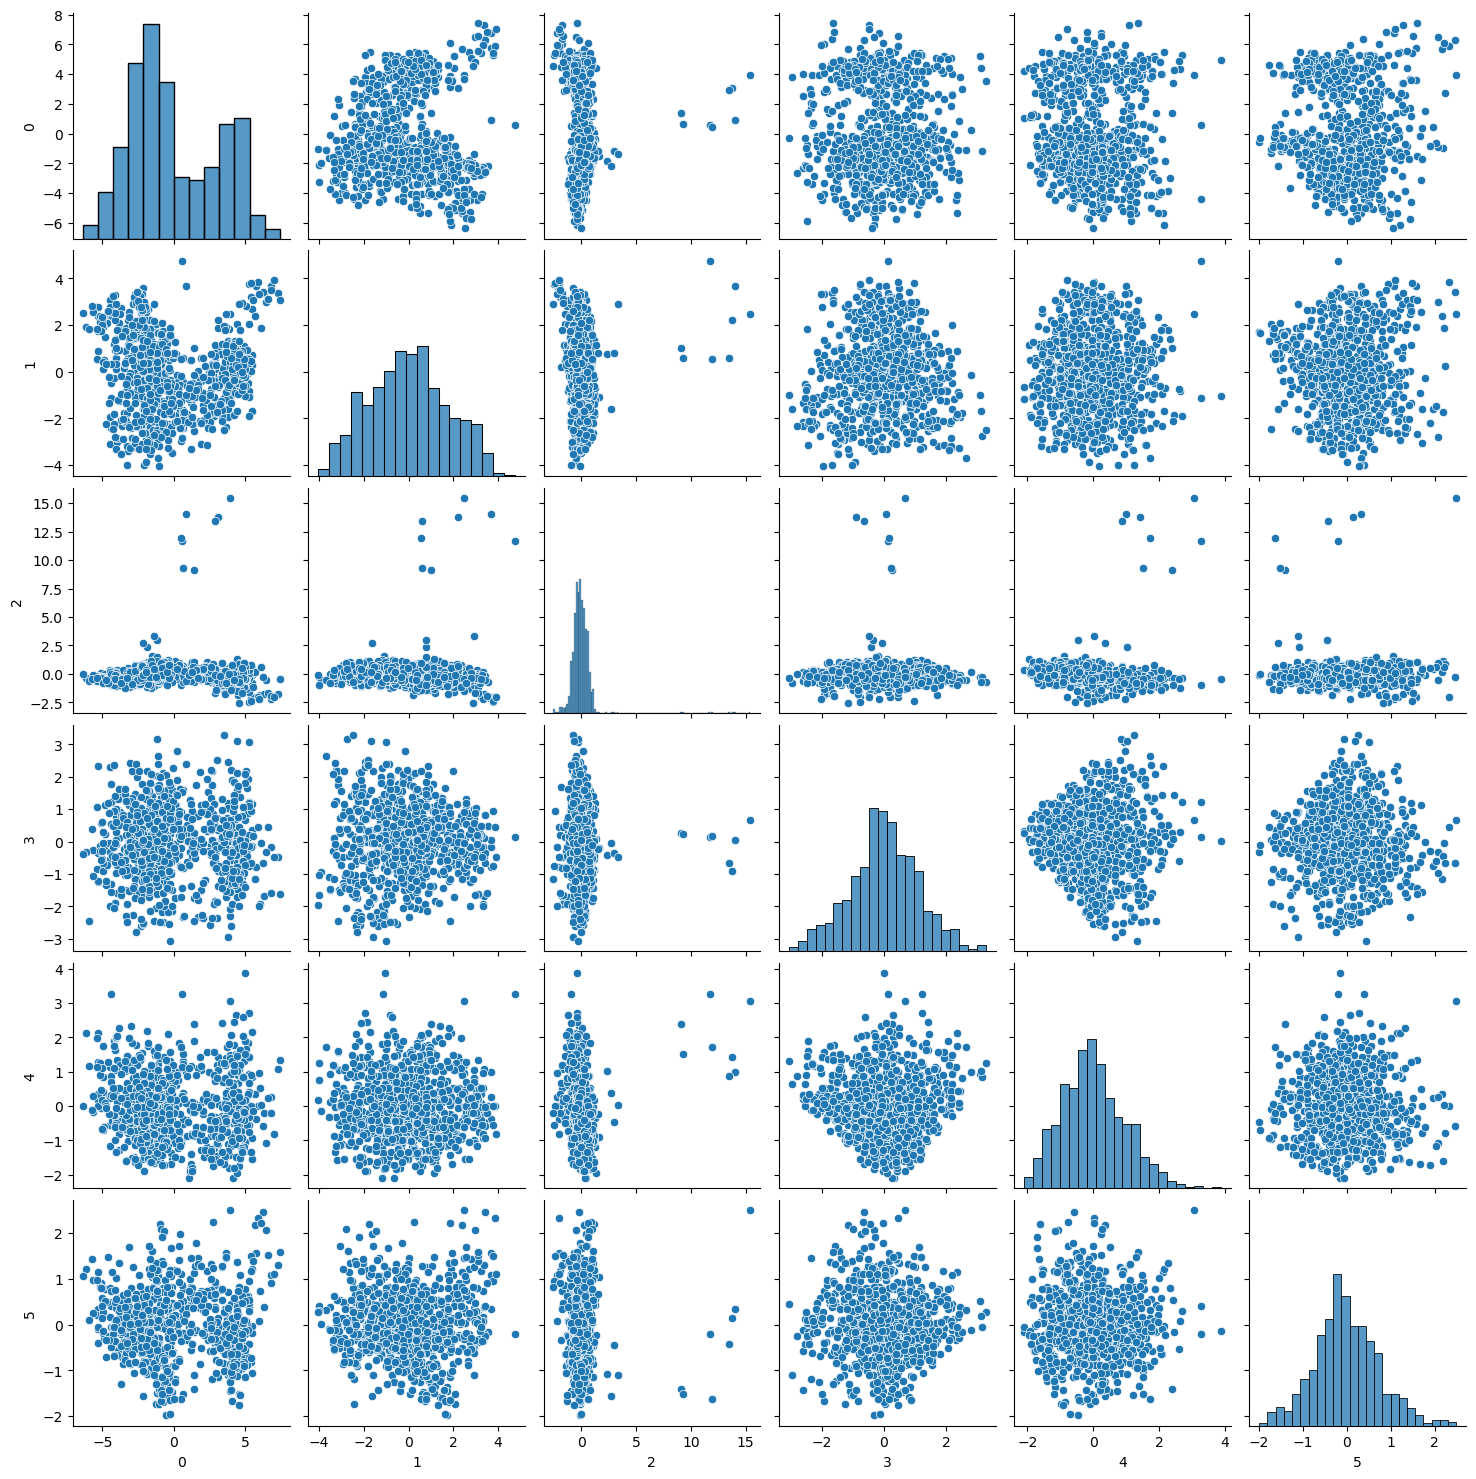

In [106]:
sns.pairplot(pd.DataFrame(Xpca6))

**Splitting the transformed features into train and test sets**

In [107]:
# Splitting X and y into training and test set in 80:20 ratio
X_train_pca6, X_test_pca6, y_train_pca6, y_test_pca6 = train_test_split(Xpca6, y, test_size=0.20, random_state=1)

**We'll train the SVM model on the transformed dataset**

In [108]:
start=time.time()
clf_pca6=svm.SVC() # Default SVM Model
clf_pca6.fit(X_train_pca6,y_train_pca6)
end=time.time()
y_predict_test_pca6=clf_pca6.predict(X_test_pca6)
y_predict_train_pca6=clf_pca6.predict(X_train_pca6)
print('Score for the trained SVM model using PCA 6 components data is: {0}'.format(metrics.accuracy_score(y_test_pca6, y_predict_test_pca6)))
print('time in seconds: ',(end-start))

SVC()

Score for the trained SVM model using PCA 6 components data is: 0.8764705882352941
time in seconds:  0.039754390716552734


In [109]:
clf_pca6.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### PCA n_components=5

In [110]:
import string
labels= ['bus','car','van']
pred_labels=["Pred "+s for s in labels]

**Confusion Matrix for Training data**

<Axes: >

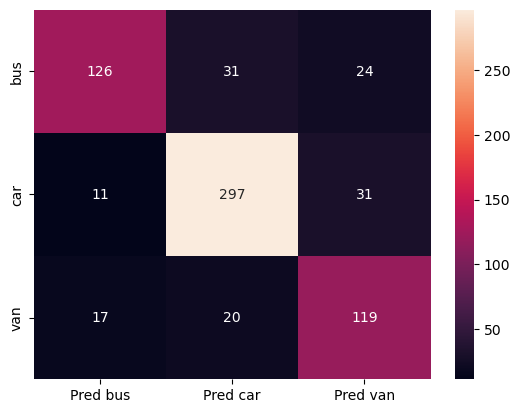

In [111]:
cm=metrics.confusion_matrix(y_train_pca5, y_predict_train_pca5,labels=[0, 1,2])
df_cm_train=pd.DataFrame(cm,index=[i for i in labels],columns=[col for col in pred_labels] )
sns.heatmap(data=df_cm_train,annot=True,fmt='g')

**Confusion Matrix for Testing data**

<Axes: >

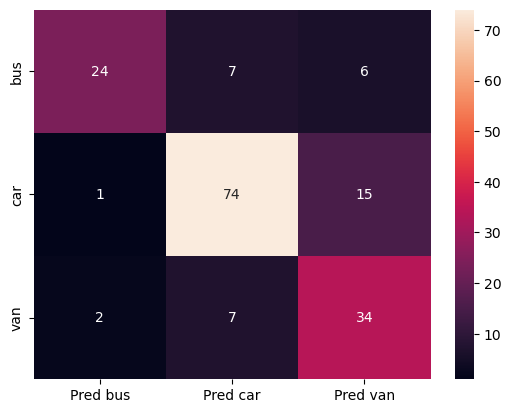

In [112]:
cm=metrics.confusion_matrix(y_test_pca5, y_predict_test_pca5,labels=[0, 1,2])
df_cm_test=pd.DataFrame(cm,index=[i for i in labels],columns=[col for col in pred_labels] )
sns.heatmap(data=df_cm_test,annot=True,fmt='g')

**Classification Report for Training data**

In [113]:
print("Classification  Report for the Model on Training data:\n",metrics.classification_report(y_train_pca5,y_predict_train_pca5))

Classification  Report for the Model on Training data:
               precision    recall  f1-score   support

           0       0.82      0.70      0.75       181
           1       0.85      0.88      0.86       339
           2       0.68      0.76      0.72       156

    accuracy                           0.80       676
   macro avg       0.79      0.78      0.78       676
weighted avg       0.80      0.80      0.80       676



**Classification Report for Testing data**

In [114]:
print("Classification  Report for the Model:\n",metrics.classification_report(y_test_pca5,y_predict_test_pca5))

Classification  Report for the Model:
               precision    recall  f1-score   support

           0       0.89      0.65      0.75        37
           1       0.84      0.82      0.83        90
           2       0.62      0.79      0.69        43

    accuracy                           0.78       170
   macro avg       0.78      0.75      0.76       170
weighted avg       0.80      0.78      0.78       170



**Accuracy**

In [115]:
svm_pca5_score_test=clf_pca5.score(X_test_pca5,y_test_pca5)
svm_pca5_score_train=clf_pca5.score(X_train_pca5,y_train_pca5)
print('Accuracy of the model on train data is: {0:0.2f}'.format(svm_pca5_score_train))
print('Accuracy of the model on test data is: {0:0.2f}'.format(svm_pca5_score_test))

Accuracy of the model on train data is: 0.80
Accuracy of the model on test data is: 0.78


**Precision**

In [116]:
precision_train_svm_pca5 = metrics.precision_score(y_train_pca5,y_predict_train_pca5,average=None)
for i , j in enumerate(precision_train_svm_pca5):
    print('The precision of the trained model on train data for class {0} is : {1:0.2f}'.format(labels[i],j))
print('\n##########################################################################\n')    
precision_test_svm_pca5 = metrics.precision_score(y_test_pca5,y_predict_test_pca5,average=None)
for i , j in enumerate(precision_test_svm_pca5):
    print('The precision of the trained model on test data for class {0} is : {1:0.2f}'.format(labels[i],j))

The precision of the trained model on train data for class bus is : 0.82
The precision of the trained model on train data for class car is : 0.85
The precision of the trained model on train data for class van is : 0.68

##########################################################################

The precision of the trained model on test data for class bus is : 0.89
The precision of the trained model on test data for class car is : 0.84
The precision of the trained model on test data for class van is : 0.62


**Recall**

In [117]:
recall_train_svm_pca5 = metrics.recall_score(y_train_pca5,y_predict_train_pca5,average=None)
for i , j in enumerate(recall_train_svm_pca5):
    print('The recall of the trained model on train data for class {0} is : {1:0.2f}'.format(labels[i],j))
print('\n##########################################################################\n')    
recall_test_svm_pca5 = metrics.recall_score(y_test_pca5,y_predict_test_pca5,average=None)
for i , j in enumerate(recall_test_svm_pca5):
    print('The recall of the trained model on test data for class {0} is : {1:0.2f}'.format(labels[i],j))

The recall of the trained model on train data for class bus is : 0.70
The recall of the trained model on train data for class car is : 0.88
The recall of the trained model on train data for class van is : 0.76

##########################################################################

The recall of the trained model on test data for class bus is : 0.65
The recall of the trained model on test data for class car is : 0.82
The recall of the trained model on test data for class van is : 0.79


**F1-Score**

In [118]:
f1_train_svm_pca5 = metrics.f1_score(y_train_pca5,y_predict_train_pca5,average=None)
for i , j in enumerate(f1_train_svm_pca5):
    print('The F1-score of the trained model on train data for class {0} is : {1:0.2f}'.format(labels[i],j))
print('\n##########################################################################\n')    
f1_test_svm_pca5 = metrics.f1_score(y_test_pca5,y_predict_test_pca5,average=None)
for i , j in enumerate(f1_test_svm_pca5):
    print('The F1-score of the trained model on test data for class {0} is : {1:0.2f}'.format(labels[i],j))

The F1-score of the trained model on train data for class bus is : 0.75
The F1-score of the trained model on train data for class car is : 0.86
The F1-score of the trained model on train data for class van is : 0.72

##########################################################################

The F1-score of the trained model on test data for class bus is : 0.75
The F1-score of the trained model on test data for class car is : 0.83
The F1-score of the trained model on test data for class van is : 0.69


### PCA n_components=6

In [119]:
import string
labels= ['bus','car','van']
pred_labels=["Pred "+s for s in labels]

**Confusion Matrix for Training data**

<Axes: >

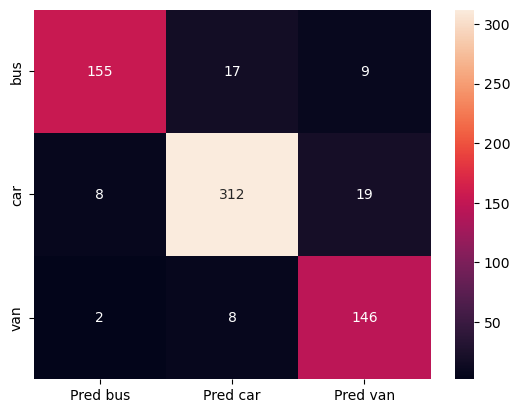

In [120]:
cm=metrics.confusion_matrix(y_train_pca6, y_predict_train_pca6,labels=[0, 1,2])
df_cm_train=pd.DataFrame(cm,index=[i for i in labels],columns=[col for col in pred_labels] )
sns.heatmap(data=df_cm_train,annot=True,fmt='g')

**Confusion Matrix for Testing data**

<Axes: >

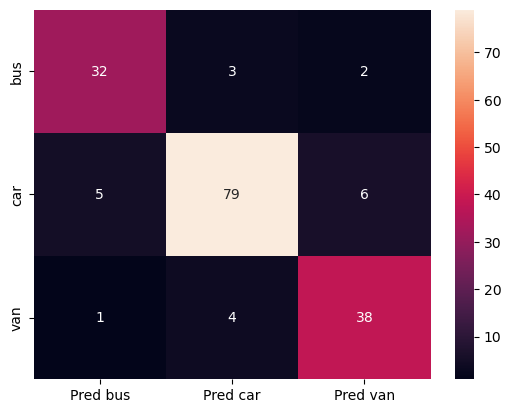

In [121]:
cm=metrics.confusion_matrix(y_test_pca6, y_predict_test_pca6,labels=[0, 1,2])
df_cm_test=pd.DataFrame(cm,index=[i for i in labels],columns=[col for col in pred_labels] )
sns.heatmap(data=df_cm_test,annot=True,fmt='g')

**Classification Report for Training data**

In [122]:
print("Classification  Report for the Model on Training data:\n",metrics.classification_report(y_train_pca6,y_predict_train_pca6))

Classification  Report for the Model on Training data:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       181
           1       0.93      0.92      0.92       339
           2       0.84      0.94      0.88       156

    accuracy                           0.91       676
   macro avg       0.90      0.90      0.90       676
weighted avg       0.91      0.91      0.91       676



**Classification Report for Testing data**

In [123]:
print("Classification  Report for the Model:\n",metrics.classification_report(y_test_pca6,y_predict_test_pca6))

Classification  Report for the Model:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.92      0.88      0.90        90
           2       0.83      0.88      0.85        43

    accuracy                           0.88       170
   macro avg       0.86      0.88      0.87       170
weighted avg       0.88      0.88      0.88       170



**Accuracy**

In [124]:
svm_pca6_score_test=clf_pca6.score(X_test_pca6,y_test_pca6)
svm_pca6_score_train=clf_pca6.score(X_train_pca6,y_train_pca6)
print('Accuracy of the model on train data is: {0:0.2f}'.format(svm_pca6_score_train))
print('Accuracy of the model on test data is: {0:0.2f}'.format(svm_pca6_score_test))

Accuracy of the model on train data is: 0.91
Accuracy of the model on test data is: 0.88


**Precision**

In [125]:
precision_train_svm_pca6 = metrics.precision_score(y_train_pca6,y_predict_train_pca6,average=None)
for i , j in enumerate(precision_train_svm_pca6):
    print('The precision of the trained model on train data for class {0} is : {1:0.2f}'.format(labels[i],j))
print('\n##########################################################################\n')    
precision_test_svm_pca6 = metrics.precision_score(y_test_pca6,y_predict_test_pca6,average=None)
for i , j in enumerate(precision_test_svm_pca6):
    print('The precision of the trained model on test data for class {0} is : {1:0.2f}'.format(labels[i],j))

The precision of the trained model on train data for class bus is : 0.94
The precision of the trained model on train data for class car is : 0.93
The precision of the trained model on train data for class van is : 0.84

##########################################################################

The precision of the trained model on test data for class bus is : 0.84
The precision of the trained model on test data for class car is : 0.92
The precision of the trained model on test data for class van is : 0.83


**Recall**

In [126]:
recall_train_svm_pca6 = metrics.recall_score(y_train_pca6,y_predict_train_pca6,average=None)
for i , j in enumerate(recall_train_svm_pca6):
    print('The recall of the trained model on train data for class {0} is : {1:0.2f}'.format(labels[i],j))
print('\n##########################################################################\n')    
recall_test_svm_pca6 = metrics.recall_score(y_test_pca6,y_predict_test_pca6,average=None)
for i , j in enumerate(recall_test_svm_pca6):
    print('The recall of the trained model on test data for class {0} is : {1:0.2f}'.format(labels[i],j))

The recall of the trained model on train data for class bus is : 0.86
The recall of the trained model on train data for class car is : 0.92
The recall of the trained model on train data for class van is : 0.94

##########################################################################

The recall of the trained model on test data for class bus is : 0.86
The recall of the trained model on test data for class car is : 0.88
The recall of the trained model on test data for class van is : 0.88


**F1-Score**

In [127]:
f1_train_svm_pca6 = metrics.f1_score(y_train_pca6,y_predict_train_pca6,average=None)
for i , j in enumerate(f1_train_svm_pca6):
    print('The F1-score of the trained model on train data for class {0} is : {1:0.2f}'.format(labels[i],j))
print('\n##########################################################################\n')    
f1_test_svm_pca6 = metrics.f1_score(y_test_pca6,y_predict_test_pca6,average=None)
for i , j in enumerate(f1_test_svm_pca6):
    print('The F1-score of the trained model on test data for class {0} is : {1:0.2f}'.format(labels[i],j))

The F1-score of the trained model on train data for class bus is : 0.90
The F1-score of the trained model on train data for class car is : 0.92
The F1-score of the trained model on train data for class van is : 0.88

##########################################################################

The F1-score of the trained model on test data for class bus is : 0.85
The F1-score of the trained model on test data for class car is : 0.90
The F1-score of the trained model on test data for class van is : 0.85


### Observations on the models built using PCA components:

**PCA n_components = 5**

Comparing the model trained on all features vs. model trained using PCA with 5 components, we can observe the following for the test data:
- Accuracy has decreased from 96% to 78%
- Precision of model has decreased:
    - bus: from 97% to 89%
    - car: from 98% to 84%
    - van: from 91% to 62%
    
- Recall of model has decreased:
    - bus: from 97% to 65%
    - car: from 96% to 82%
    - van: from 95% to 79%
    
- F1-Score of model has decreased:
    - bus: from 97% to 75%
    - car: from 97% to 83%
    - van: from 93% to 69%

**PCA n_components = 6**

Comparing the model trained on all features vs. model trained using PCA with 6 components, we can observe the following for the test data:
- Accuracy has decreased from 96% to 88%
- Precision of model has decreased:
    - bus: from 97% to 84%
    - car: from 98% to 92%
    - van: from 91% to 83%
    
- Recall of model has decreased:
    - bus: from 97% to 86%
    - car: from 96% to 88%
    - van: from 95% to 88%
    
- F1-Score of model has decreased:
    - bus: from 97% to 85%
    - car: from 97% to 90%
    - van: from 93% to 85%

**Based on the above data we further observe that:**
- The performance of the models deteriorates when we reduce dimensions using PCA
- The more the PCA components, the better the performance of the model
- PCA can potentially reduce execution time for training the models
- PCA helps in training models which are independent of curse of dimensionality

### PCA n_components=5

In [128]:
#setting the Hyperparameters range
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
skf = StratifiedKFold(n_splits=10)
C=list(np.arange(1,51,1))
kernel=['rbf']
gamma=list(np.arange(0.01,0.051,0.001))

#Initializing the hyperparameters dictionary
hyperparameters_svm = dict(C=C,gamma=gamma,kernel=kernel)
start=time.time()
svm5=svm.SVC()
svm_pca5_model = GridSearchCV(svm5, hyperparameters_svm, refit = True, verbose = 3, n_jobs=-1, cv=skf,scoring='accuracy')
#Fitting the model
svm_pca5_model.fit(X_train_pca5,y_train_pca5)
end=time.time()
print('time in seconds: ',(end-start))
svm_pca5_model.best_score_

Fitting 10 folds for each of 2050 candidates, totalling 20500 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...],
                         'gamma': [0.01, 0.011, 0.011999999999999999,
                                   0.012999999999999998, 0.013999999999999997,
                                   0.014999999999999996, 0.015999999999999993,
                                   0.01699999999999999...
                                   0.024999999999999988, 0.02599999999999999,
                                   0.02699999999999999, 0.027999999999999983,
                                   0.028999999999999984, 0.029999999999999985,
                                   0.030999999999999986, 0.03199999999999998,
                                   0.03299999999999998, 0.03399999999999998,
                                   0.03499999999999998, 0.035999999999999976,
                                   0.03699999999999998, 0.03799999999999998,
                                   0.03899999999999998, ...],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

time in seconds:  198.681072473526


0.825241439859526

In [129]:
print('The score of the new model on training data is: {0:0.2f}'.format(svm_pca5_model.score(X_train_pca5,y_train_pca5)));
print('The score of the new model on test data is: {0:0.2f}'.format(svm_pca5_model.score(X_test_pca5, y_test_pca5)));

The score of the new model on training data is: 0.88
The score of the new model on test data is: 0.86


### PCA n_components=6

In [130]:
#setting the Hyperparameters range
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
skf = StratifiedKFold(n_splits=10)
C=list(np.arange(1,51,1))
kernel=['rbf']
gamma=list(np.arange(0.01,0.051,0.001))

#Initializing the hyperparameters dictionary
hyperparameters_svm = dict(C=C,gamma=gamma,kernel=kernel)
start=time.time()
svm6=svm.SVC()
svm_pca6_model = GridSearchCV(svm6, hyperparameters_svm, refit = True, verbose = 3, n_jobs=-1, cv=skf,scoring='accuracy')
#Fitting the model
svm_pca6_model.fit(X_train_pca6,y_train_pca6)
end=time.time()
print('time in seconds: ',(end-start))
svm_pca6_model.best_score_

Fitting 10 folds for each of 2050 candidates, totalling 20500 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...],
                         'gamma': [0.01, 0.011, 0.011999999999999999,
                                   0.012999999999999998, 0.013999999999999997,
                                   0.014999999999999996, 0.015999999999999993,
                                   0.01699999999999999...
                                   0.024999999999999988, 0.02599999999999999,
                                   0.02699999999999999, 0.027999999999999983,
                                   0.028999999999999984, 0.029999999999999985,
                                   0.030999999999999986, 0.03199999999999998,
                                   0.03299999999999998, 0.03399999999999998,
                                   0.03499999999999998, 0.035999999999999976,
                                   0.03699999999999998, 0.03799999999999998,
                                   0.03899999999999998, ...],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

time in seconds:  151.4152126312256


0.9245171202809483

In [131]:
print('The score of the new model on training data is: {0:0.2f}'.format(svm_pca6_model.score(X_train_pca6,y_train_pca6)));
print('The score of the new model on test data is: {0:0.2f}'.format(svm_pca6_model.score(X_test_pca6, y_test_pca6)));

The score of the new model on training data is: 0.94
The score of the new model on test data is: 0.91


### PCA n_components=5

In [132]:
svm_pca5_model.best_estimator_.get_params()

{'C': 44,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.04599999999999997,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**The best parameters of the tuned SVM model are:**
- C = 44
- gamma = 0.46
- kernel = rbf

**Eigen Values of the PCA components**

In [133]:
print(pca_5.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063]


**Eigen Vectors of the PCA components**

In [134]:
print(pca_5.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592035e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008426e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

### PCA n_components=6

In [135]:
svm_pca6_model.best_estimator_.get_params()

{'C': 33,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.035999999999999976,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**The best parameters of the tuned SVM model are:**
- C = 33
- gamma = 0.36
- kernel = rbf

**Eigen Values of the PCA components**

In [136]:
print(pca_6.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263]


**Eigen Vectors of the PCA components**

In [137]:
print(pca_6.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053416e-02
   3.27257120e-02  3.14147277e-02 -9.

### PCA n_components=5

In [138]:
y_predict_test_pca5_tuned=svm_pca5_model.predict(X_test_pca5)
y_predict_train_pca5_tuned=svm_pca5_model.predict(X_train_pca5)

**Confusion Matrix for Training data**

<Axes: >

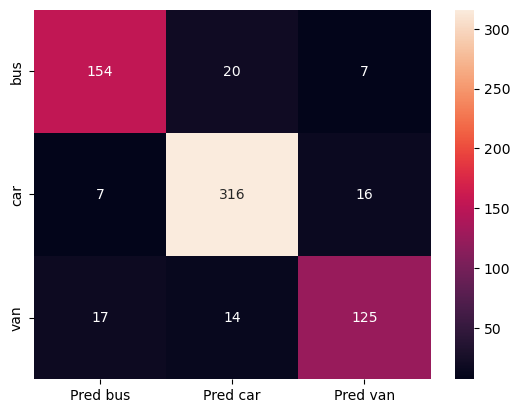

In [139]:
cm=metrics.confusion_matrix(y_train_pca5, y_predict_train_pca5_tuned,labels=[0, 1,2])
df_cm_train=pd.DataFrame(cm,index=[i for i in labels],columns=[col for col in pred_labels] )
sns.heatmap(data=df_cm_train,annot=True,fmt='g')

**Confusion Matrix for Testing data**

<Axes: >

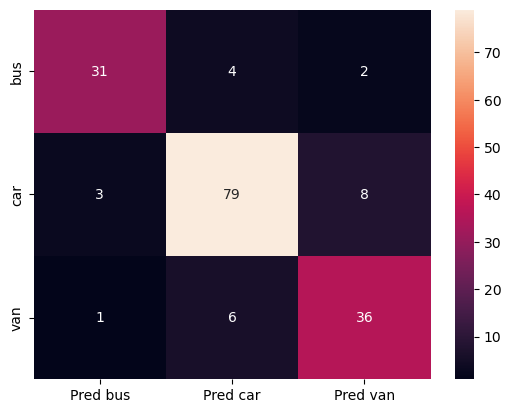

In [140]:
cm=metrics.confusion_matrix(y_test_pca5, y_predict_test_pca5_tuned,labels=[0, 1,2])
df_cm_test=pd.DataFrame(cm,index=[i for i in labels],columns=[col for col in pred_labels] )
sns.heatmap(data=df_cm_test,annot=True,fmt='g')

**Classification Report for Training data**

In [141]:
print("Classification  Report for the Model on Training data:\n",metrics.classification_report(y_train_pca5,y_predict_train_pca5_tuned))

Classification  Report for the Model on Training data:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       181
           1       0.90      0.93      0.92       339
           2       0.84      0.80      0.82       156

    accuracy                           0.88       676
   macro avg       0.87      0.86      0.87       676
weighted avg       0.88      0.88      0.88       676



**Classification Report for Testing data**

In [142]:
print("Classification  Report for the Model:\n",metrics.classification_report(y_test_pca5,y_predict_test_pca5_tuned))

Classification  Report for the Model:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86        37
           1       0.89      0.88      0.88        90
           2       0.78      0.84      0.81        43

    accuracy                           0.86       170
   macro avg       0.85      0.85      0.85       170
weighted avg       0.86      0.86      0.86       170



**Accuracy**

In [143]:
svm_pca5_score_test_tuned=svm_pca5_model.score(X_test_pca5,y_test_pca5)
svm_pca5_score_train_tuned=svm_pca5_model.score(X_train_pca5,y_train_pca5)
print('Accuracy of the model on train data is: {0:0.2f}'.format(svm_pca5_score_train_tuned))
print('Accuracy of the model on test data is: {0:0.2f}'.format(svm_pca5_score_test_tuned))

Accuracy of the model on train data is: 0.88
Accuracy of the model on test data is: 0.86


**Precision**

In [144]:
precision_train_svm_pca5_tuned = metrics.precision_score(y_train_pca5,y_predict_train_pca5_tuned,average=None)
for i , j in enumerate(precision_train_svm_pca5_tuned):
    print('The precision of the trained model on train data for class {0} is : {1:0.2f}'.format(labels[i],j))
print('\n##########################################################################\n')    
precision_test_svm_pca5_tuned = metrics.precision_score(y_test_pca5,y_predict_test_pca5_tuned,average=None)
for i , j in enumerate(precision_test_svm_pca5_tuned):
    print('The precision of the trained model on test data for class {0} is : {1:0.2f}'.format(labels[i],j))

The precision of the trained model on train data for class bus is : 0.87
The precision of the trained model on train data for class car is : 0.90
The precision of the trained model on train data for class van is : 0.84

##########################################################################

The precision of the trained model on test data for class bus is : 0.89
The precision of the trained model on test data for class car is : 0.89
The precision of the trained model on test data for class van is : 0.78


**Recall**

In [145]:
recall_train_svm_pca5_tuned = metrics.recall_score(y_train_pca5,y_predict_train_pca5_tuned,average=None)
for i , j in enumerate(recall_train_svm_pca5_tuned):
    print('The recall of the trained model on train data for class {0} is : {1:0.2f}'.format(labels[i],j))
print('\n##########################################################################\n')    
recall_test_svm_pca5_tuned = metrics.recall_score(y_test_pca5,y_predict_test_pca5_tuned,average=None)
for i , j in enumerate(recall_test_svm_pca5_tuned):
    print('The recall of the trained model on test data for class {0} is : {1:0.2f}'.format(labels[i],j))

The recall of the trained model on train data for class bus is : 0.85
The recall of the trained model on train data for class car is : 0.93
The recall of the trained model on train data for class van is : 0.80

##########################################################################

The recall of the trained model on test data for class bus is : 0.84
The recall of the trained model on test data for class car is : 0.88
The recall of the trained model on test data for class van is : 0.84


**F1-Score**

In [146]:
f1_train_svm_pca5_tuned = metrics.f1_score(y_train_pca5,y_predict_train_pca5_tuned,average=None)
for i , j in enumerate(f1_train_svm_pca5_tuned):
    print('The F1-score of the trained model on train data for class {0} is : {1:0.2f}'.format(labels[i],j))
print('\n##########################################################################\n')    
f1_test_svm_pca5_tuned = metrics.f1_score(y_test_pca5,y_predict_test_pca5_tuned,average=None)
for i , j in enumerate(f1_test_svm_pca5_tuned):
    print('The F1-score of the trained model on test data for class {0} is : {1:0.2f}'.format(labels[i],j))

The F1-score of the trained model on train data for class bus is : 0.86
The F1-score of the trained model on train data for class car is : 0.92
The F1-score of the trained model on train data for class van is : 0.82

##########################################################################

The F1-score of the trained model on test data for class bus is : 0.86
The F1-score of the trained model on test data for class car is : 0.88
The F1-score of the trained model on test data for class van is : 0.81


**Improvement in performance of the SVM model using 5 PCA components  on testing data after tuning the hyperparameters is as below:**

In [147]:
print('\033[1mImprovement in the performance for SVM model using 5 PCA components on testing data after tuning is as below:\033[0m\n')

print('Improvement in Accuracy = {0:0.2f}%'.format((svm_pca5_score_test_tuned-svm_pca5_score_test)*100/svm_pca5_score_test))
print('\n******************************************\n')

for i , j in enumerate(precision_train_svm_pca5_tuned):
    print('Improvement in Precision for Class {0} is: {1:0.2f}'.format(labels[i],(j-precision_train_svm_pca5[i])*100/precision_train_svm_pca5[i]))
    
print('\n******************************************\n')

for i , j in enumerate(recall_train_svm_pca5_tuned):
    print('Improvement in Recall for Class {0} is: {1:0.2f}'.format(labels[i],(j-recall_train_svm_pca5[i])*100/recall_train_svm_pca5[i]))

print('\n******************************************\n')

for i , j in enumerate(f1_train_svm_pca5_tuned):
    print('Improvement in F1-Score for Class {0} is: {1:0.2f}'.format(labels[i],(j-f1_train_svm_pca5[i])*100/f1_train_svm_pca5[i]))

Improvement in the performance for SVM model using 5 PCA components on testing data after tuning is as below:

Improvement in Accuracy = 10.61%

******************************************

Improvement in Precision for Class bus is: 5.74
Improvement in Precision for Class car is: 5.79
Improvement in Precision for Class van is: 23.50

******************************************

Improvement in Recall for Class bus is: 22.22
Improvement in Recall for Class car is: 6.40
Improvement in Recall for Class van is: 5.04

******************************************

Improvement in F1-Score for Class bus is: 14.05
Improvement in F1-Score for Class car is: 6.09
Improvement in F1-Score for Class van is: 14.03


### PCA n_components=6

In [148]:
y_predict_test_pca6_tuned=svm_pca6_model.predict(X_test_pca6)
y_predict_train_pca6_tuned=svm_pca6_model.predict(X_train_pca6)

**Confusion Matrix for Training data**

<Axes: >

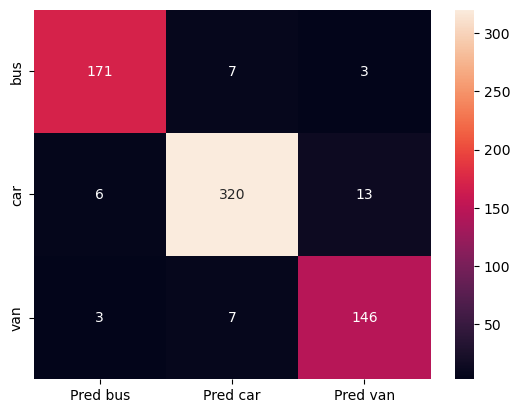

In [149]:
cm=metrics.confusion_matrix(y_train_pca6, y_predict_train_pca6_tuned,labels=[0, 1,2])
df_cm_train=pd.DataFrame(cm,index=[i for i in labels],columns=[col for col in pred_labels] )
sns.heatmap(data=df_cm_train,annot=True,fmt='g')

**Confusion Matrix for Testing data**

<Axes: >

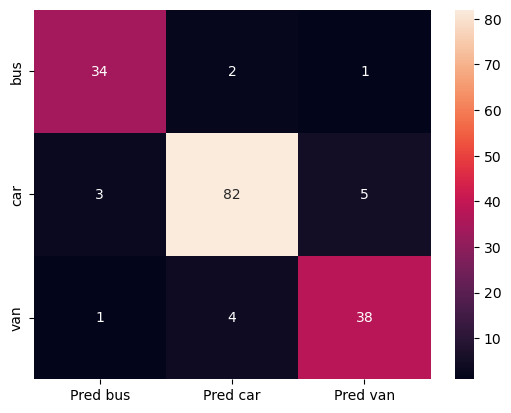

In [150]:
cm=metrics.confusion_matrix(y_test_pca6, y_predict_test_pca6_tuned,labels=[0, 1,2])
df_cm_test=pd.DataFrame(cm,index=[i for i in labels],columns=[col for col in pred_labels] )
sns.heatmap(data=df_cm_test,annot=True,fmt='g')

**Classification Report for Training data**

In [151]:
print("Classification  Report for the Model on Training data:\n",metrics.classification_report(y_train_pca6,y_predict_train_pca6_tuned))

Classification  Report for the Model on Training data:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       181
           1       0.96      0.94      0.95       339
           2       0.90      0.94      0.92       156

    accuracy                           0.94       676
   macro avg       0.94      0.94      0.94       676
weighted avg       0.94      0.94      0.94       676



**Classification Report for Testing data**

In [152]:
print("Classification  Report for the Model:\n",metrics.classification_report(y_test_pca6,y_predict_test_pca6_tuned))

Classification  Report for the Model:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.93      0.91      0.92        90
           2       0.86      0.88      0.87        43

    accuracy                           0.91       170
   macro avg       0.90      0.90      0.90       170
weighted avg       0.91      0.91      0.91       170



**Accuracy**

In [153]:
svm_pca6_score_test_tuned=svm_pca6_model.score(X_test_pca6,y_test_pca6)
svm_pca6_score_train_tuned=svm_pca6_model.score(X_train_pca6,y_train_pca6)
print('Accuracy of the model on train data is: {0:0.2f}'.format(svm_pca6_score_train_tuned))
print('Accuracy of the model on test data is: {0:0.2f}'.format(svm_pca6_score_test_tuned))

Accuracy of the model on train data is: 0.94
Accuracy of the model on test data is: 0.91


**Precision**

In [154]:
precision_train_svm_pca6_tuned = metrics.precision_score(y_train_pca6,y_predict_train_pca6_tuned,average=None)
for i , j in enumerate(precision_train_svm_pca6_tuned):
    print('The precision of the trained model on train data for class {0} is : {1:0.2f}'.format(labels[i],j))
print('\n##########################################################################\n')    
precision_test_svm_pca6_tuned = metrics.precision_score(y_test_pca6,y_predict_test_pca6_tuned,average=None)
for i , j in enumerate(precision_test_svm_pca6_tuned):
    print('The precision of the trained model on test data for class {0} is : {1:0.2f}'.format(labels[i],j))

The precision of the trained model on train data for class bus is : 0.95
The precision of the trained model on train data for class car is : 0.96
The precision of the trained model on train data for class van is : 0.90

##########################################################################

The precision of the trained model on test data for class bus is : 0.89
The precision of the trained model on test data for class car is : 0.93
The precision of the trained model on test data for class van is : 0.86


**Recall**

In [155]:
recall_train_svm_pca6_tuned = metrics.recall_score(y_train_pca6,y_predict_train_pca6_tuned,average=None)
for i , j in enumerate(recall_train_svm_pca6_tuned):
    print('The recall of the trained model on train data for class {0} is : {1:0.2f}'.format(labels[i],j))
print('\n##########################################################################\n')    
recall_test_svm_pca6_tuned = metrics.recall_score(y_test_pca6,y_predict_test_pca6_tuned,average=None)
for i , j in enumerate(recall_test_svm_pca6_tuned):
    print('The recall of the trained model on test data for class {0} is : {1:0.2f}'.format(labels[i],j))

The recall of the trained model on train data for class bus is : 0.94
The recall of the trained model on train data for class car is : 0.94
The recall of the trained model on train data for class van is : 0.94

##########################################################################

The recall of the trained model on test data for class bus is : 0.92
The recall of the trained model on test data for class car is : 0.91
The recall of the trained model on test data for class van is : 0.88


**F1-Score**

In [156]:
f1_train_svm_pca6_tuned = metrics.f1_score(y_train_pca6,y_predict_train_pca6_tuned,average=None)
for i , j in enumerate(f1_train_svm_pca6_tuned):
    print('The F1-score of the trained model on train data for class {0} is : {1:0.2f}'.format(labels[i],j))
print('\n##########################################################################\n')    
f1_test_svm_pca6_tuned = metrics.f1_score(y_test_pca6,y_predict_test_pca6_tuned,average=None)
for i , j in enumerate(f1_test_svm_pca6_tuned):
    print('The F1-score of the trained model on test data for class {0} is : {1:0.2f}'.format(labels[i],j))

The F1-score of the trained model on train data for class bus is : 0.95
The F1-score of the trained model on train data for class car is : 0.95
The F1-score of the trained model on train data for class van is : 0.92

##########################################################################

The F1-score of the trained model on test data for class bus is : 0.91
The F1-score of the trained model on test data for class car is : 0.92
The F1-score of the trained model on test data for class van is : 0.87


**Improvement in performance of the SVM model using 6 PCA components on testing data after tuning the hyperparameters is as below:**

In [157]:
print('\033[1mImprovement in the performance for SVM model using 6 PCA components on testing data after tuning is as below:\033[0m\n')

print('Improvement in Accuracy = {0:0.2f}%'.format((svm_pca6_score_test_tuned-svm_pca6_score_test)*100/svm_pca6_score_test))
print('\n******************************************\n')

for i , j in enumerate(precision_train_svm_pca6_tuned):
    print('Improvement in Precision for Class {0} is: {1:0.2f}'.format(labels[i],(j-precision_train_svm_pca6[i])*100/precision_train_svm_pca6[i]))
    
print('\n******************************************\n')

for i , j in enumerate(recall_train_svm_pca6_tuned):
    print('Improvement in Recall for Class {0} is: {1:0.2f}'.format(labels[i],(j-recall_train_svm_pca6[i])*100/recall_train_svm_pca6[i]))

print('\n******************************************\n')

for i , j in enumerate(f1_train_svm_pca6_tuned):
    print('Improvement in F1-Score for Class {0} is: {1:0.2f}'.format(labels[i],(j-f1_train_svm_pca6[i])*100/f1_train_svm_pca6[i]))

Improvement in the performance for SVM model using 6 PCA components on testing data after tuning is as below:

Improvement in Accuracy = 3.36%

******************************************

Improvement in Precision for Class bus is: 1.13
Improvement in Precision for Class car is: 3.49
Improvement in Precision for Class van is: 7.41

******************************************

Improvement in Recall for Class bus is: 10.32
Improvement in Recall for Class car is: 2.56
Improvement in Recall for Class van is: 0.00

******************************************

Improvement in F1-Score for Class bus is: 5.74
Improvement in F1-Score for Class car is: 3.02
Improvement in F1-Score for Class van is: 3.77


### Observations after tuning the models built using PCA components:

**PCA n_components = 5**

Comparing the base model and the model after tuning the hyperparameters, both using PCA with 5 components, we can observe the following for the test data:
- Accuracy has improved by 10.61%
- Precision of model has improved:
    - bus: by 5.74%
    - car: by 5.79%
    - van: by 23.5%
    
- Recall of model has improved:
    - bus: by 22.22%
    - car: by 6.4%
    - van: by 5.04%
    
- F1-Score of model has decreased:
    - bus: by 14.05%
    - car: by 6.09%
    - van: by 14.03%

**PCA n_components = 6**

Comparing the base model and the model after tuning the hyperparameters, both using PCA with 6 components, we can observe the following for the test data:
- Accuracy has improved by 3.36%
- Precision of model has improved:
    - bus: by 1.13%
    - car: by 3.49%
    - van: by 7.41%
    
- Recall of model has improved:
    - bus: by 10.32%
    - car: by 2.56%
    - van: by 0% (no improvement)
    
- F1-Score of model has decreased:
    - bus: by 5.74%
    - car: by 3.02%
    - van: by 3.77%

**Based on the above data we further observe that:**
- Even though the model performance deteriorates with PCA based dimesionality reduction, the model performance can be improved by tuning the hyperparameters of the models.
- Even by accounting for 90% variance of the data, it is possible to achieve decent model performance by tuning the model's hyperparameters. In this example, by capturing 90% variance in the data and tuning the model hyperparameters we are able to achieve an accuracy of 86% on the testing data.
- By accounting for close to 95% of variance in the data, it is possible to achieve very high accuracy by tuning the hyperparameters of the model. In this example, by capturing 94% variance in the data and tuning the model hyperparameters we are able to achieve an accuracy of 91% on the testing data.
- Considering the above we can conclude that PCA covers the variances in the data very well withn a eigen vectors, compared to the original data columns

**Pre-Requisite/Assumptions of PCA:**
- **Linearity in data**: PCA assumes linear relations between the variables. Based on this PCA derives the components which are linear combinations of the inpur features.
    - In our data set, based on the pairplot and heatmap, we can see there are several features with high collinearity.
- **Numerical Variables**: PCA is applicable to numerical features which are continuous in nature, and is not applicable to categorical features.
    - Our dataset has continuous variables as input variables and hence PCA was possible for those features.
- **Consistent Scale for all features**: PCA assumes that the features are on a common consistent scale.
    - In our dataset the features were not on a common scale, so we applied z-score scaling to bring the features to a common scale.
- **Homoscedasticity**: PCA assumes that the variances of all the variables are similar. This means that no single variable should have a significantly higher or lower variance than the others.
- **Outliers**: PCA assumes that there are no outliers in the fetures.

**Advantages of PCA:**
- **Reduces Multi-Collinearity**: PCA reduces multi-collinearity in the data by producing features which are independent of each other
- **Addresses Curse of Dimensionality**: PCA reduces the number of dimensions, by producing relatively lesser number of features called principal components, which are linear combinations of the original variables and are orthogonal to each other.
- **Reduces noise in the data**: Since PCA produces features by capturing maximum variances in the data, the smaller noise components get ignored in the final feature list.
- **Reduces Model training time**: PCA reduces the number of dimensions, which helps in reducing the model training time and the model needs to learn on fewer features.


**Limitations of PCA:**
- **Information Loss**: In PCA principal components are ordered in decreasing order of importance, and each component explains a certain percentage of the total variance in the data. If we don’t select the right number of principal components that explain enough variation in the dataset, we may lose out on some useful information that may otherwise would've helped the ML model.
- **Interpretation of components**: The principal components created by PCA are linear combinations of the original features of the data. It can be difficult to interpret the meaning of each component and which features of the input dataset are the most significant. Basically PCA cannot provide feature importances and coefficients of the input features on the final model.
- **Assumes Linearity in features**: PCA assumes that the relationships between the variables are linear. If the relationships are non-linear, PCA may not be able to capture the complete relation between the features and hence cannot capture the variances in the data, resulting in low accuracy models.
- **Assumes standardized data**: PCA assumes that the data is standardized on a common scale. If the data is not standardized, variables with larger scales will dominate the resulting components and the resulting models.
- **Sensitive to Outliers**: Since outliers have large impact on the variance of the data, and PCA functions by capturing the variances, presence of outliers can result in principal components which dont accurately capture the information.

### Summary

- To summarize, since the number of input features in the dataset is large, it is suggested to execute PCA on the dataset to address curse of dimensionality
- There are several features with high correlation, PCA will also help in this by reducing multi-collinearity
- Even by accounting for 90% variance in the data with 5 PCA components we can achieve decent model performance of 86% accuracy with hyperparameter tuning. It is suggetsed to account for about 95% of vaiance. With 6 PCA components we were able to capture 94% variance in data, which resulted in a stable model having 91% accuracy with hyperparameter tuning